In [1]:
%%time

from pysme.synthesize import synthesize_spectrum
from pysme.linelist.vald import ValdFile
from pysme.sme import SME_Structure
from pysme.solve import solve
from pysme.abund import Abund
from pysme import sme as SME
from pysme import util

from matplotlib.colorbar import Colorbar
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib as mpl
import pandas as pd
import numpy as np
import warnings
import glob
import sys
import os

warnings.filterwarnings('ignore')

CPU times: user 1.23 s, sys: 173 ms, total: 1.4 s
Wall time: 1.53 s


In [2]:
#Move to the correct directory: Pristine-UVES
os.chdir('/store/teams/cosmos/fgran/data/Pristine-UVES/')

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
#Each module is independent, except for the common cells above

In [5]:
#Plot #1: comparison UVES-Pristine-XGBoost

In [6]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [10]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves = uves.drop_duplicates(subset='source_id', keep='first')

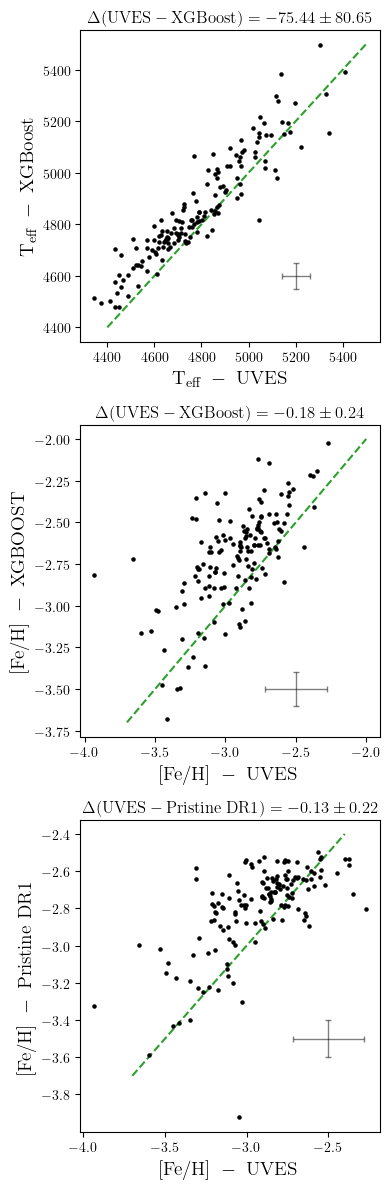

In [8]:
plt.figure(figsize=(4,12), dpi=100)

plt.subplot(3,1,3)

mean = np.mean(uves.feh.values - uves.FeH_CaHKsyn_50th.values)
std = np.std(uves.feh.values - uves.FeH_CaHKsyn_50th.values)
yerr_pg = (uves.FeH_CaHKsyn_84th.values - uves.FeH_CaHKsyn_16th.values)/2.

plt.scatter(uves.feh.values, uves.FeH_CaHKsyn_50th.values, s=5, color='k')
plt.errorbar(-2.5, -3.5, xerr=np.mean(uves.efe_sme.values) * 0.90, yerr=np.mean(yerr_pg), fmt='.', alpha=0.5, zorder=0, lw=1, color='k', marker='', capsize=2.5)

x = np.linspace(-3.7, -2.4)
plt.plot(x, x, color='C2', ls='--', zorder=0)
plt.xlabel(r'${\rm [Fe/H]\ -\ UVES}$', size=14)
plt.ylabel(r'${\rm [Fe/H]\ -\ Pristine\ DR1}$', size=14)
plt.title(r'$\Delta({\rm UVES-Pristine\ DR1})= %2.2f \pm %2.2f$' %(mean, std), fontsize=12)

plt.subplot(3,1,1)

mean = np.mean(uves.teff.values - uves.teff_xgboost.values)
std = np.std(uves.teff.values - uves.teff_xgboost.values)

plt.scatter(uves.teff.values, uves.teff_xgboost.values, s=5, color='k')
plt.errorbar(5200, 4600, xerr=np.mean(uves.eteff_sme.values), yerr=50., fmt='.', alpha=0.5, zorder=0, lw=1, color='k', marker='', capsize=2.5)

x = np.linspace(4400, 5500)
plt.plot(x, x, color='C2', ls='--', zorder=0)
plt.xlabel(r'${\rm T_{eff}\ -\ UVES}$', size=14)
plt.ylabel(r'${\rm T_{eff}\ -\ XGBoost}$', size=14)
plt.title(r'$\Delta({\rm UVES-XGBoost})= %2.2f \pm %2.2f$' %(mean, std), fontsize=12)

plt.subplot(3,1,2)

mean = np.mean(uves.monh.values - uves.mh_xgboost.values)
std = np.std(uves.monh.values - uves.mh_xgboost.values)

plt.scatter(uves.feh.values, uves.mh_xgboost.values, s=5, color='k')
plt.errorbar(-2.5, -3.5, xerr=np.mean(uves.efe_sme.values) * 0.90, yerr=0.1, fmt='.', alpha=0.5, zorder=0, lw=1, color='k', marker='', capsize=2.5)

x = np.linspace(-3.7, -2.0)
plt.plot(x, x, color='C2', ls='--', zorder=0)
plt.xlabel(r'${\rm [Fe/H]\ -\ UVES}$', size=14)
plt.ylabel(r'${\rm [Fe/H]\ -\ XGBOOST}$', size=14)
plt.title(r'$\Delta({\rm UVES-XGBoost})= %2.2f \pm %2.2f$' %(mean, std), fontsize=12)

plt.tight_layout()
plt.savefig('plots/UVES_Pristine_XGBoost_comparison.pdf', dpi=300)
plt.show()

In [9]:
#Statistics!

In [10]:
num_m2p5 = uves.query('FeH_CaHKsyn_50th < -2.5 and feh < -2.5').teff.size
num_total = uves.query('feh < -2.5').teff.size
print('Total of stars below -2.5 dex in both UVES and Pristine: %d. Total percentage: %2.1f' %(num_m2p5, 100*num_m2p5/num_total))

Total of stars below -2.5 dex in both UVES and Pristine: 144. Total percentage: 99.3


In [11]:
num_m2p5 = uves.query('mh_xgboost < -2.5 and feh < -2.5').teff.size
num_total = uves.query('feh < -2.5').teff.size
print('Total of stars below -2.5 dex in both UVES and XGBoost: %d. Total percentage: %2.1f' %(num_m2p5, 100*num_m2p5/num_total))

Total of stars below -2.5 dex in both UVES and XGBoost: 118. Total percentage: 81.4


In [12]:
num_m3p0 = uves.query('FeH_CaHKsyn_50th < -3.0 and feh < -3.0').teff.size
num_total = uves.query('feh < -3.0').teff.size
print('Total of stars below -3.0 dex in both UVES and Pristine: %d. Total percentage: %2.1f' %(num_m3p0, 100*num_m3p0/num_total))

Total of stars below -3.0 dex in both UVES and Pristine: 23. Total percentage: 38.3


In [13]:
num_m3p0 = uves.query('mh_xgboost < -3.0 and feh < -3.0').teff.size
num_total = uves.query('feh < -3.0').teff.size
print('Total of stars below -3.0 dex in both UVES and XGBoost: %d. Total percentage: %2.1f' %(num_m3p0, 100*num_m3p0/num_total))

Total of stars below -3.0 dex in both UVES and XGBoost: 18. Total percentage: 30.0


In [14]:
uves.query('spec_id == "6488378098744387968_3576337_082"')[['run', 'blue_file', 'red_file']]

,run,blue_file,red_file
103,111.251N.003,ADP.2023-06-09T13:42:48.981.fits,ADP.2023-06-09T13:42:48.984.fits


In [15]:
uves.query('-3.6 < feh < -3.4')[['spec_id', 'teff', 'logg', 'feh']]

,spec_id,teff,logg,feh
7,2541284393302759296_3708442_129,4857.518002,1.997741,-3.415006
9,2569615268897126016_3708424_127,4459.123592,1.197214,-3.598179
62,4854289415101796608_3708430_135,4508.978338,1.545356,-3.449522
67,5050991770433282688_3704139_126,4456.912937,1.342650,-3.481639
103,6488378098744387968_3576337_082,4656.622167,1.614050,-3.532186
127,6705676437173390848_3576283_076,4434.154199,1.124606,-3.434048
155,6881847646233384704_3573240_054,4597.454957,1.350270,-3.495118


In [ ]:
# T = 4700 logg=1.7 [Fe/H]=3.5

In [89]:
#Plot #2: comparison of baryradial velocities

In [90]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs.csv')

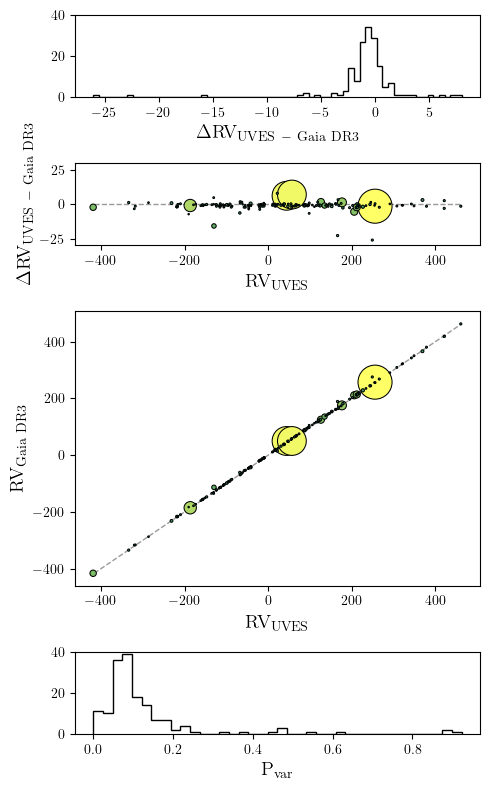

In [92]:
fig = plt.figure(1, figsize=(5,8), dpi=100)

gs = gridspec.GridSpec(nrows=4, ncols=1, height_ratios=[0.3, 0.3, 1.0, 0.3])
# gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.2, hspace=0.03)
point_sizes = 2.**(10*uves.sort_values(by='pvar', ascending=False).pvar.values)

ax1 = plt.subplot(gs[0,0])
delta_rvs = uves.sort_values(by='pvar', ascending=False).rv_red1.values + uves.sort_values(by='pvar', ascending=False).barycor.values - uves.sort_values(by='pvar', ascending=False).radial_velocity.values
ax1.hist(delta_rvs, bins='auto', histtype='step', color='k', log=False)
ax1.set_xlabel(r'${\rm \Delta RV_{UVES\ -\ Gaia\ DR3}}$', size=14)
ax1.set_ylim(0, 40)

ax2 = plt.subplot(gs[1,0])
ax2.scatter(uves.sort_values(by='pvar', ascending=False).rv_blue.values + uves.sort_values(by='pvar', ascending=False).barycor.values, delta_rvs,
            c=uves.sort_values(by='pvar', ascending=False).pvar.values, ec='k', lw=0.75, cmap=plt.cm.summer, s=point_sizes)
x = np.linspace(uves.sort_values(by='pvar', ascending=False).radial_velocity.values.min(), uves.sort_values(by='pvar', ascending=False).radial_velocity.values.max(), 100)
ax2.plot(x, np.zeros_like(x), color='grey', alpha=0.8, lw=1, ls='--', zorder=0)
ax2.set_ylim(-30., 30)
ax2.set_xlabel(r'${\rm RV_{UVES}}$', size=14)
ax2.set_ylabel(r'${\rm \Delta RV_{UVES\ -\ Gaia\ DR3}}$', size=14)

ax3 = plt.subplot(gs[2,0])
ax3.scatter(uves.sort_values(by='pvar', ascending=False).rv_blue.values + uves.sort_values(by='pvar', ascending=False).barycor.values, uves.sort_values(by='pvar', ascending=False).radial_velocity.values,
            c=uves.sort_values(by='pvar', ascending=False).pvar.values, ec='k', lw=0.75, cmap=plt.cm.summer, s=point_sizes)
ax3.plot(x, x, color='grey', alpha=0.8, lw=1, ls='--', zorder=0)
ax3.set_xlabel(r'${\rm RV_{UVES}}$', size=14)
ax3.set_ylabel(r'${\rm RV_{Gaia\ DR3}}$', size=14)

ax4 = plt.subplot(gs[3,0])
ax4.hist(uves.pvar.values, bins='auto', histtype='step', color='k')
ax4.set_xlabel(r'${\rm P_{var}}$', size=14)
ax4.set_ylim(0, 40)

plt.tight_layout()
plt.savefig('plots/UVES_Gaia_RVs_comparison.pdf', dpi=300)
plt.show()

In [93]:
print('Median Delta RV: %2.2f' %np.median(delta_rvs))
print('Std RV: %2.2f' %np.std(delta_rvs))

print()

out_stars = np.sum(np.abs(delta_rvs) > 5.0)
print('There are %d stars outside 5 km/s' %out_stars)

print()

print('Mean RV unc: %2.2f' %np.median(uves.erv_red1.values))

print()

print('Stars with Pvar > 0.3: %d' %np.sum(uves.pvar.values > 0.3)) 

Median Delta RV: -0.72
Std RV: 3.44

There are 10 stars outside 5 km/s

Mean RV unc: 0.04

Stars with Pvar > 0.3: 11


In [68]:
#Plot #3: CMD-Kiel diagrams

In [72]:
%%time
#Read isochrones
basti = pd.read_hdf('iso/BaSTI_GDR3_2MASS_WISE_All_ages_afe=0.4.h5', key='table')

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [45]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs.csv')

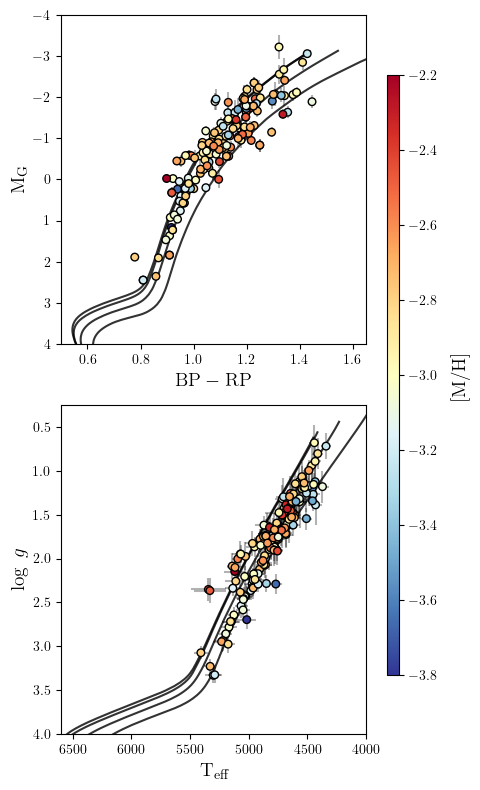

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,8), dpi=100)

cmap = plt.cm.RdYlBu_r
n = 1290 #convinient BaSTI index for MS/TO/RGB

plt.subplot(2,1,1)
plt.scatter(uves.bp0.values - uves.rp0.values, uves.g0.values - 5*np.log10(uves.rpgeo.values) + 5., s=30, c=uves.monh.values, cmap=cmap, edgecolors='k', vmin=-3.8, vmax=-2.2)
ebp = uves.ebp.values #(2.5/np.log(10)) * (uves.phot_bp_mean_flux_error.values / uves.phot_bp_mean_flux)
erp = uves.erp.values #(2.5/np.log(10)) * (uves.phot_rp_mean_flux_error.values / uves.phot_rp_mean_flux)
emg = ((uves.g0.values - 5*np.log10(uves.b_rpgeo.values) + 5.) - (uves.g0.values - 5*np.log10(uves.B_rpgeo.values) + 5.))/2.
plt.errorbar(uves.bp0.values - uves.rp0.values, uves.g0.values - 5*np.log10(uves.rpgeo.values) + 5., fmt='k.', alpha=0.3, xerr=(ebp**2. + erp**2.)**0.5, yerr=emg, zorder=0)

for age, meta in np.vstack(([[13.0, 13.0, 13.0, 13.0], [-1.5, -2.0, -2.5, -3.0]])).T:
    iso = basti[(basti.age.values == age) & (basti.meta.values == meta)]
    iso = iso[iso.reset_index().index < n]
    plt.plot(iso.G_BP.values - iso.G_RP.values, iso.G.values, color='k', zorder=0, alpha=0.8)

plt.ylim(4, -4.0)
plt.xlim(0.5, 1.65)
plt.xlabel(r'${\rm BP-RP}$', size=14)
plt.ylabel(r'${\rm M_G}$', size=14)

plt.subplot(2,1,2)
scatter = plt.scatter(uves.teff.values, uves.logg.values, s=30, c=uves.monh.values, cmap=cmap, edgecolors='k', vmin=-3.8, vmax=-2.2)
plt.errorbar(uves.teff.values, uves.logg.values, fmt='k.', xerr=uves.eteff_sme.values, yerr=uves.elogg_sme.values, alpha=0.3, zorder=0)

for age, meta in np.vstack(([[13.0, 13.0, 13.0, 13.0], [-1.5, -2.0, -2.5, -3.0]])).T:
    iso = basti[(basti.age.values == age) & (basti.meta.values == meta)]
    iso = iso[iso.reset_index().index < n]
    plt.plot(iso.Teff.values, iso.logg.values, color='k', zorder=0, alpha=0.8)

plt.ylim(4., 0.25)
plt.xlim(6600, 4000)
plt.xlabel(r'${\rm T_{eff}}$', size=14)
plt.ylabel(r'$\log\ g$', size=14)

cbar_ax = fig.add_axes([0.98, 0.15, 0.03, 0.75]) #[left, bottom, width, height]
cb = fig.colorbar(scatter, cax=cbar_ax)
cb.set_label(r'${\rm [M/H]}$', labelpad=10, fontsize=14)

plt.tight_layout()
plt.savefig('plots/UVES_CMD_Kiel.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [11]:
#Plot #4: Normalisation of pySME uncs

In [12]:
uves = pd.read_csv('uves_p111_p112_pristinedr1_xgboost_logg.csv')
uves = uves.merge(pd.read_csv('tmp_merged/UVES_atm.csv'), on='spec_id')

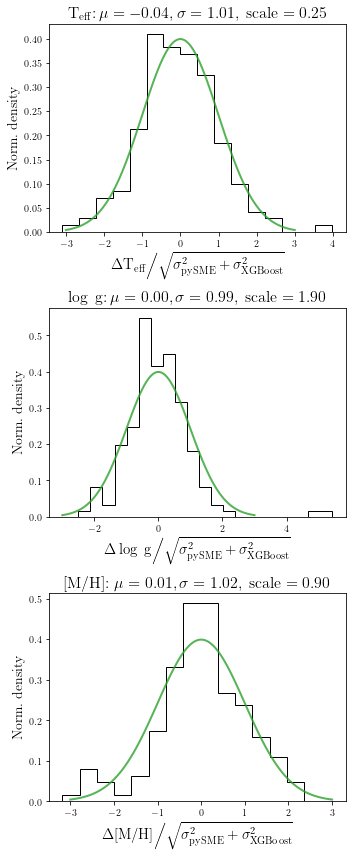

In [9]:
plt.figure(figsize=(5,12))

x = np.linspace(-3, 3, 100)

plt.subplot(3,1,1)
scale_factor_teff, shift_teff = 0.25, np.mean(uves.teff.values - uves.teff_xgboost.values)
q = (uves.teff.values - uves.teff_xgboost.values - shift_teff) / np.sqrt((scale_factor_teff * uves.eteff_sme.values)**2. + (50 * np.ones_like(uves.teff.values))**2.)
plt.hist(q, bins='auto', histtype='step', density=True, color='k', lw=1)
plt.plot(x, norm.pdf(x), color='C2', lw=2, alpha=0.8)
plt.title(r'${\rm T_{eff}{:}\, \mu= %2.2f, \sigma= %2.2f,\ scale=%1.2f}$' %(np.mean(q), np.std(q), scale_factor_teff), fontsize=16)
plt.xlabel(r'$\left. \Delta {\rm T_{eff}} \middle/ \sqrt{\sigma_{\rm pySME}^2 + \sigma_{\rm XGBoost}^2} \right.$', size=15)
plt.ylabel(r'${\rm Norm.\ density}$', size=14)

plt.subplot(3,1,2)
scale_factor_logg, shift_logg = 1.9, np.mean(uves.logg.values - uves.logg_xgboost.values)
q = (uves.logg.values - uves.logg_xgboost.values - shift_logg) / np.sqrt((scale_factor_logg * uves.elogg_sme.values)**2. + (0.08 * np.ones_like(uves.logg.values))**2.)
plt.hist(q, bins='auto', histtype='step', density=True, color='k', lw=1)
plt.plot(x, norm.pdf(x), color='C2', lw=2, alpha=0.8)
plt.title(r'${\rm \log\ g{:}\, \mu= %2.2f, \sigma= %2.2f,\ scale=%1.2f}$' %(np.mean(q), np.std(q), scale_factor_logg), fontsize=16)
plt.xlabel(r'$\left. \Delta \log\ {\rm g} \middle/ \sqrt{\sigma_{\rm pySME}^2 + \sigma_{\rm XGBoost}^2} \right.$', size=15)
plt.ylabel(r'${\rm Norm.\ density}$', size=14)

plt.subplot(3,1,3)
scale_factor_monh, shift_monh = 0.90, np.mean(uves.monh.values - uves.mh_xgboost.values)
q = (uves.monh.values - uves.mh_xgboost.values - shift_monh) / np.sqrt((scale_factor_monh * uves.emonh_sme.values)**2. + (0.1 * np.ones_like(uves.monh.values))**2.)
plt.hist(q, bins='auto', histtype='step', density=True, color='k', lw=1)
plt.plot(x, norm.pdf(x), color='C2', lw=2, alpha=0.8)
plt.title(r'${\rm [M/H]{:}\ \mu= %2.2f, \sigma= %2.2f,\ scale=%1.2f}$' %(np.mean(q), np.std(q), scale_factor_monh), fontsize=16)
plt.xlabel(r'$\left. \Delta {\rm [M/H]} \middle/ \sqrt{\sigma_{\rm pySME}^2 + \sigma_{\rm XGBoost}^2} \right.$', size=15)
plt.ylabel(r'${\rm Norm.\ density}$', size=14)

plt.tight_layout()
plt.savefig('plots/UVES_uncs_normalisation.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [5]:
#Plot #5: Litium-rich star

In [6]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [7]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')

In [8]:
li = pd.read_csv('tmp_merged/UVES_li.csv')
li = uves.merge(right=li, on='spec_id')
li['li_6100_corrected'] = li.li_6100.values + li.li_6100_nlte_corr.values
li['li_6700_corrected'] = li.li_6700.values + li.li_6700_nlte_corr.values

spec_id = '6661076122378750208_3572802_012'
sme = SME_Structure.load('sme_save/UVES_li_%s.sme' %spec_id)

INFO - Loading SME file sme_save/UVES_li_6661076122378750208_3572802_012.sme


In [9]:
wl_6100, wl_6700 = sme.wave[0], sme.wave[1]
flux_6100, flux_6700 = sme.spec[0], sme.spec[1]
eflux_6100, eflux_6700 = sme.uncs[0], sme.uncs[1]
model_6100, model_6700 = sme.synth[0], sme.synth[1]

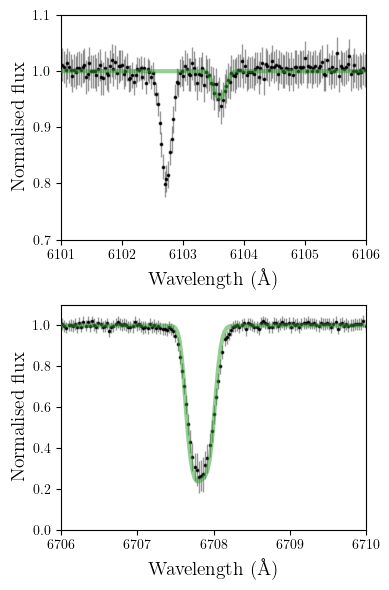

In [10]:
plt.figure(figsize=(4,6), dpi=100)

plt.subplot(2,1,1)
plt.scatter(wl_6100, flux_6100, s=1, color='k')
plt.errorbar(wl_6100, flux_6100, color='k', ms=4, alpha=0.4, fmt='k.', yerr=eflux_6100, lw=1)
plt.plot(wl_6100, model_6100, color='C2', lw=3, alpha=0.5, zorder=9)

# plt.vlines(6103.54, 0.55, 0.6, color='C4')
# plt.vlines(6103.65, 0.55, 0.6, color='C4')
# plt.vlines(6103.60, 0.75, 0.8, color='C4')

plt.xlim(6101, 6106)
plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=14)
plt.ylabel(r'${\rm Normalised\ flux}$', size=14)
plt.ylim(0.7, 1.1)

plt.subplot(2,1,2)
plt.scatter(wl_6700, flux_6700, s=1, color='k')
plt.errorbar(wl_6700, flux_6700, color='k', ms=4, alpha=0.4, fmt='k.', yerr=eflux_6700, lw=1)
plt.plot(wl_6700, model_6700, color='C2', lw=3, alpha=0.5, zorder=9)

# plt.vlines(6707.76, 0.05, 0.1, color='C4')
# plt.vlines(6707.91, 0.05, 0.1, color='C4')
# plt.vlines(6707.82, 0.05, 0.1, color='C4')

plt.xlim(6706, 6710)
plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=14)
plt.ylabel(r'${\rm Normalised\ flux}$', size=14)
plt.ylim(0.0, 1.1)

plt.tight_layout()
plt.savefig('plots/UVES_Li_rich_spec.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [11]:
li_star = li[['teff', 'logg', 'feh', 'li_6700', 'li_6700_nlte_corr', 'li_6700_corrected', 'li_6100', 'li_6100_nlte_corr', 'li_6100_corrected']].sort_values(by='li_6700', ascending=False).head(1)
li_star.head()

,teff,logg,feh,li_6700,li_6700_nlte_corr,li_6700_corrected,li_6100,li_6100_nlte_corr,li_6100_corrected
118,4528.761658,1.139871,-2.766027,2.345859,-0.628885,1.716973,2.1976,-0.540164,1.657436


In [13]:
life = li_star.li_6700_corrected.values - solar.abund.get_element('Li')
print('[Li/Fe] = %2.2f' %life)

[Li/Fe] = 0.67


In [7]:
#Plot 6: duplicate information

In [8]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe.csv')

In [9]:
dup_source_ids, dup_counts = np.unique(uves.source_id.values, return_counts=True)

In [10]:
dup_source_ids = dup_source_ids[dup_counts > 1]

In [11]:
dup_delta_teff = np.zeros_like(dup_source_ids).astype(float)
dup_delta_monh = np.zeros_like(dup_source_ids).astype(float)

dup_delta_vmic = np.zeros_like(dup_source_ids).astype(float)
dup_delta_vmac = np.zeros_like(dup_source_ids).astype(float)

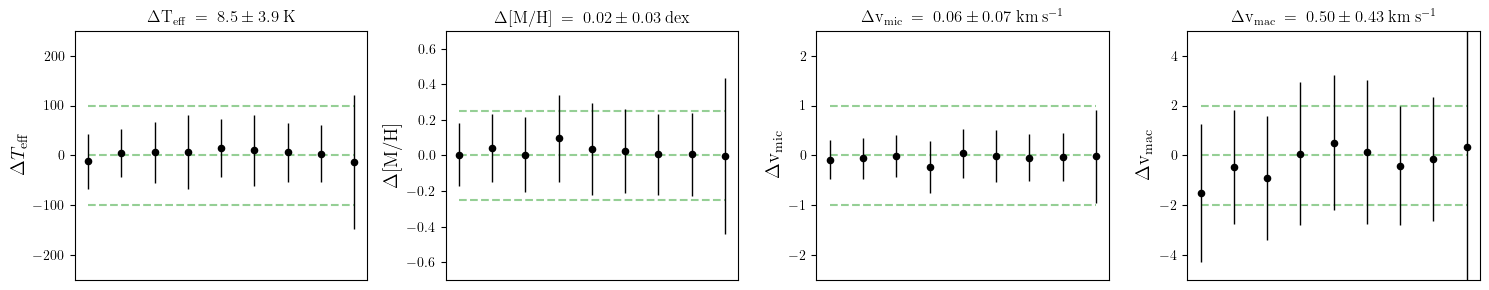

In [14]:
plt.figure(figsize=(15,3), dpi=100)
for i, dup_source_id in enumerate(dup_source_ids):
    
    dup_star = uves.query("source_id == %s" %dup_source_id)
        
    dup_delta_teff[i] = np.abs(dup_star.teff.values[1]-dup_star.teff.values[0])
    dup_delta_monh[i] = np.abs(dup_star.monh.values[1]-dup_star.monh.values[0])
    
    dup_delta_vmic[i] = np.abs(dup_star.vmic.values[1]-dup_star.vmic.values[0])
    dup_delta_vmac[i] = np.abs(dup_star.vmac.values[1]-dup_star.vmac.values[0])
    
    plt.subplot(1,4,1)
    plt.errorbar(i, dup_star.teff.values[1]-dup_star.teff.values[0], yerr=np.min(dup_star.eteff_sme.values), fmt='k.', lw=1)
    plt.scatter(i, dup_star.teff.values[1]-dup_star.teff.values[0], color='k', s=20, zorder=9)
    plt.xticks([])
    
    plt.subplot(1,4,2)
    plt.errorbar(i, dup_star.monh.values[1]-dup_star.monh.values[0], yerr=np.min(dup_star.emonh_sme.values), fmt='k.', lw=1)
    plt.scatter(i, dup_star.monh.values[1]-dup_star.monh.values[0], color='k', s=20, zorder=9)
    plt.xticks([])
    
    plt.subplot(1,4,3)
    plt.errorbar(i, dup_star.vmic.values[1]-dup_star.vmic.values[0], yerr=np.min(dup_star.evmic_sme.values * 0.5), fmt='k.', lw=1)
    plt.scatter(i, dup_star.vmic.values[1]-dup_star.vmic.values[0], color='k', s=20, zorder=9)
    plt.xticks([])
    
    plt.subplot(1,4,4)
    plt.errorbar(i, dup_star.vmac.values[1]-dup_star.vmac.values[0], yerr=np.min(dup_star.evmac_sme.values * 0.5), fmt='k.', lw=1)
    plt.scatter(i, dup_star.vmac.values[1]-dup_star.vmac.values[0], color='k', s=20, zorder=9)
    plt.xticks([])


teff_limits = 250
monh_limits = 0.7
vmic_limits = 2.5
vmac_limits = 5.0

plt.subplot(1,4,1)
plt.ylabel(r'$\Delta T_{\rm eff}$', size=14)
plt.hlines(0, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(100, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(-100, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.ylim(-teff_limits, teff_limits)
plt.title(r'${\rm \Delta T_{eff}\ =\ %2.1f\pm %2.1f\ K}$'%(np.mean(dup_delta_teff), np.std(dup_delta_teff)))
plt.subplot(1,4,2)
plt.ylabel(r'$\Delta {\rm [M/H]}$', size=14)
plt.hlines(0, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(0.25, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(-0.25, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.ylim(-monh_limits, monh_limits)
plt.title(r'${\rm \Delta [M/H]\ =\ %2.2f\pm %2.2f\ dex}$'%(np.mean(dup_delta_monh), np.std(dup_delta_monh)))
plt.subplot(1,4,3)
plt.ylabel(r'$\Delta {\rm v_{\rm mic}}$', size=14)
plt.hlines(0, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(1, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(-1, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.ylim(-vmic_limits, vmic_limits)
plt.title(r'${\rm \Delta v_{mic}\ =\ %2.2f\pm %2.2f\ km\ s^{-1}}$'%(np.mean(dup_delta_vmic), np.std(dup_delta_vmic)))
plt.subplot(1,4,4)
plt.ylabel(r'$\Delta {\rm v_{\rm mac}}$', size=14)
plt.hlines(0, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(2, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.hlines(-2, 0, 8, color='C2', ls='--', zorder=0, alpha=0.5)
plt.ylim(-vmac_limits, vmac_limits)
plt.title(r'${\rm \Delta v_{mac}\ =\ %2.2f\pm %2.2f\ km\ s^{-1}}$'%(np.mean(dup_delta_vmac), np.std(dup_delta_vmac)))

plt.tight_layout()
plt.savefig('plots/UVES_duplicates.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [31]:
#Plot 7: Mg triplet of the rapid rotator

In [9]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [10]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')

In [11]:
uves.query('teff > 5200')[['spec_id', 'teff', 'monh', 'vmac', 'feh']]

,spec_id,teff,monh,vmac,feh
3,1741229533355306496_3573222_036,5407.709280,-2.789139,3.775952,-2.819679
19,2882976353396129408_3708481_137,5301.721796,-3.206490,4.458668,-3.212093
20,2882976353396129408_3708481_142,5289.555378,-3.201854,2.950278,-3.216617
26,3184578612007287680_3708454_141,5328.915472,-2.737008,3.668781,-2.774824
115,6638289946484861184_3573754_112,5221.089481,-2.676556,4.592802,-2.725158
116,6638289946484861184_3573754_117,5231.240157,-2.650713,4.723788,-2.697257
150,6859555838257273600_3573691_106,5343.904006,-2.468315,28.500013,-2.603791
151,6859555838257273600_3573691_115,5330.997623,-2.470666,28.835901,-2.607693


In [12]:
spec_id = '6859555838257273600_3573691_106'
sme = SME_Structure.load('sme_save/UVES_atm_%s.sme' %spec_id)

spec_id = '6638289946484861184_3573754_117'
sme_ = SME_Structure.load('sme_save/UVES_atm_%s.sme' %spec_id)

INFO - Loading SME file sme_save/UVES_atm_6859555838257273600_3573691_106.sme
INFO - Loading SME file sme_save/UVES_atm_6638289946484861184_3573754_117.sme


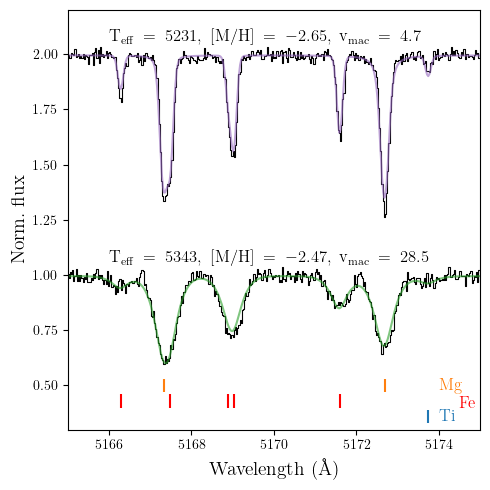

In [13]:
plt.figure(figsize=(5,5), dpi=100)

plt.step(sme.wave.data, sme.spec.data, lw=0.8, color='k', alpha=0.99, where='mid')
plt.plot(sme.wave.data, sme.synth.data, lw=1.5, color='C2', alpha=0.6)

plt.step(sme_.wave.data, sme_.spec.data + 1.0, lw=0.8, color='k', alpha=0.99, where='mid')
plt.plot(sme_.wave.data, sme_.synth.data + 1.0, lw=1.5, color='C4', alpha=0.6)

elems_to_include = ['Mg 1']
for wline, species, depth in pd.DataFrame(sme.linelist)[['wlcent', 'species', 'depth']].values:
    if (species == 'Fe 1') | (species == 'Fe 2'):
        plt.vlines(wline, 0.40, 0.46, color='r')
    if (species == 'Ti 1') | (species == 'Ti 2'):
        plt.vlines(wline, 0.33, 0.39, color='C0')
    if species not in elems_to_include:
        continue
    plt.vlines(wline, 0.47, 0.53, color='C1')

plt.text(x=5174, y=0.477, s=r'${\rm Mg}$', color='C1', size=12)
plt.text(x=5174.5, y=0.40, s=r'${\rm Fe}$', color='r', size=12)
plt.text(x=5174, y=0.34, s=r'${\rm Ti}$', color='C0', size=12)

teff, monh, vmac = sme_.teff, sme_.monh, sme_.vmac
plt.text(x=5166, y=2.06, s=r'${\rm T_{eff}\ =\ %d,\ [M/H]\ =\ %2.2f,\ v_{mac}\ =\ %2.1f}$' %(teff, monh, vmac), color='k', size=12)
teff, monh, vmac = sme.teff, sme.monh, sme.vmac
plt.text(x=5166, y=1.06, s=r'${\rm T_{eff}\ =\ %d,\ [M/H]\ =\ %2.2f,\ v_{mac}\ =\ %2.1f}$' %(teff, monh, vmac), color='k', size=12)

plt.xlim(5165, 5175)
plt.ylim(0.30, 2.2)

plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=14)
plt.ylabel(r'${\rm Norm.\ flux}$', size=14)

plt.tight_layout()
plt.savefig('plots/UVES_rapid_rotator_spec.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [6]:
#Plot #8: atmospheric parameter comparison with "First Stars" sample

In [15]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [16]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe.csv')

delta_fe = 7.67 - 7.50
cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe') - delta_fe

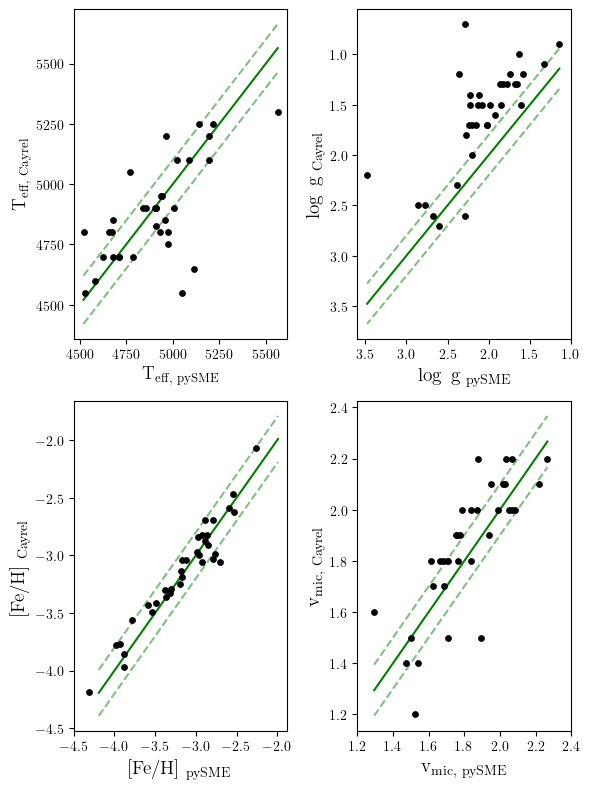

In [10]:
plt.figure(figsize=(6,8), dpi=100)

plt.subplot(2,2,1)
plt.scatter(cayrel.teff.values, cayrel.teff_cayrel.values, color='k', s=15, zorder=9)
x = cayrel.teff.values
x = np.linspace(np.min(x), np.max(x), 50)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+100, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-100, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm T_{eff,\ pySME}}$', size=13)
plt.ylabel(r'${\rm T_{eff,\ Cayrel}}$', size=13)
plt.xticks([4500, 4750, 5000, 5250, 5500])
plt.yticks([4500, 4750, 5000, 5250, 5500])

plt.subplot(2,2,2)
plt.scatter(cayrel.logg.values, cayrel.logg_cayrel.values, color='k', s=15, zorder=9)
x = cayrel.logg.values
x = np.linspace(np.min(x), np.max(x), 50)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\ g_{\ pySME}}$', size=14)
plt.ylabel(r'${\rm \log\ g_{\ Cayrel}}$', size=14)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
plt.yticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5])

plt.subplot(2,2,3)
plt.scatter(cayrel.feh.values, cayrel.monh_cayrel.values, color='k', s=15, zorder=9)
x = cayrel.monh.values
x = np.linspace(np.min(x), np.max(x), 50)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm [Fe/H]_{\ pySME}}$', size=14)
plt.ylabel(r'${\rm [Fe/H]_{\ Cayrel}}$', size=14)
plt.xticks([-4.5, -4.0, -3.5, -3.0, -2.5, -2.0])
plt.yticks([-4.5, -4.0, -3.5, -3.0, -2.5, -2.0])

plt.subplot(2,2,4)
plt.scatter(cayrel.vmic.values, cayrel.vmic_cayrel.values, color='k', s=15, zorder=9)
x = cayrel.vmic.values
x = np.linspace(np.min(x), np.max(x), 50)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.1, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.1, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm v_{mic,\ pySME}}$', size=14)
plt.ylabel(r'${\rm v_{mic,\ Cayrel}}$', size=14)
plt.xticks([1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
plt.yticks([1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

plt.tight_layout()
plt.savefig('plots/Cayrel_pySME_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [11]:
#Comparison for Teff 
q = (cayrel.teff.values - cayrel.teff_cayrel.values)[np.abs(cayrel.teff.values - cayrel.teff_cayrel.values) < 250.]
mean, std = np.mean(q), np.std(q)
print(r'Delta Teff = %2.2f +- %2.2f' %(mean, std))

#Comparison for logg 
q = (cayrel.logg.values - cayrel.logg_cayrel.values)[np.abs(cayrel.teff.values - cayrel.teff_cayrel.values) < 250.]
mean, std = np.mean(q), np.std(q)
print(r'Delta logg = %2.2f +- %2.2f' %(mean, std))

#Comparison for [Fe/H] 
q = (cayrel.feh.values - cayrel.monh_cayrel.values)[np.abs(cayrel.teff.values - cayrel.teff_cayrel.values) < 250.]
mean, std = np.mean(q), np.std(q)
print(r'Delta [Fe/H] = %2.2f +- %2.2f' %(mean, std))

#Comparison for vmic
q = (cayrel.vmic.values - cayrel.vmic_cayrel.values)[np.abs(cayrel.teff.values - cayrel.teff_cayrel.values) < 250.]
mean, std = np.mean(q), np.std(q)
print(r'Delta vmic = %2.2f +- %2.2f' %(mean, std))

Delta Teff = -3.88 +- 99.66
Delta logg = 0.42 +- 0.20
Delta [Fe/H] = -0.04 +- 0.10
Delta vmic = -0.04 +- 0.16


In [6]:
#Plot #9: carbon comparison with "First Stars" sample

In [7]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [8]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn.csv')

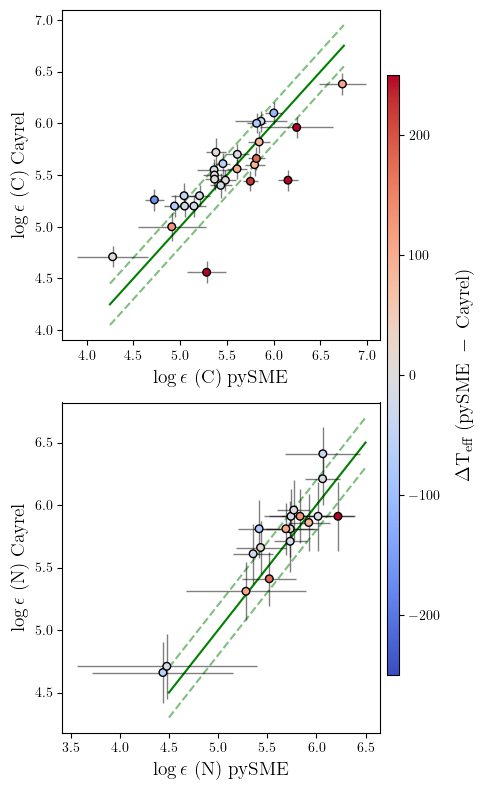

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,8), dpi=100)

cmap = plt.cm.coolwarm

plt.subplot(2,1,1)
f_ec = (cayrel.ec_sme < 0.5)
s05_extra_unc_c = 0.09
plt.errorbar(cayrel.c.values[f_ec] + cayrel.monh.values[f_ec], cayrel.logeC_c04.values[f_ec], fmt='k.', 
             xerr=cayrel.ec_sme.values[f_ec], yerr=np.sqrt(cayrel.ech_s05.values[f_ec]**2. + s05_extra_unc_c**2.), lw=1.0, zorder=1, alpha=0.5)
scatter = plt.scatter(cayrel.c.values[f_ec] + cayrel.monh.values[f_ec], cayrel.logeC_c04.values[f_ec], 
            c=(cayrel.teff.values[f_ec] - cayrel.teff_cayrel.values[f_ec]), s=30, ec='k', cmap=plt.cm.coolwarm, vmin=-250, vmax=250, zorder=9)
x = np.linspace(4.25, 6.75)
plt.plot(x,x,color='g', zorder=0)
plt.plot(x,x+0.2,color='g', ls='--', alpha=0.5, zorder=0)
plt.plot(x,x-0.2,color='g', ls='--', alpha=0.5, zorder=0)
plt.xlabel(r'${\rm \log\epsilon\ (C)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (C)\ Cayrel}$', size=14)

plt.subplot(2,1,2)
n_s05_solar, delta_n_solar = 8.05, 8.05 - 7.83
f_en = (cayrel.en_sme < 1.0) & (~cayrel.is_limit_nh_adopted_s05.values)
s05_extra_unc_n, extra_shift_n = 0.19, 0.0
plt.errorbar(cayrel.n.values[f_en] + cayrel.monh.values[f_en] + extra_shift_n, cayrel.nh_adopted_s05.values[f_en] + n_s05_solar - delta_n_solar, fmt='k.', 
             xerr=cayrel.en_sme.values[f_en], yerr=np.sqrt(cayrel.en_nh_s05.values[f_en]**2. + s05_extra_unc_n**2.), lw=1, zorder=1, alpha=0.5)
plt.scatter(cayrel.n.values[f_en] + cayrel.monh.values[f_en] + extra_shift_n, cayrel.nh_adopted_s05.values[f_en] + n_s05_solar - delta_n_solar, 
            c=(cayrel.teff.values[f_en] - cayrel.teff_cayrel.values[f_en]), s=30, ec='k', cmap=plt.cm.coolwarm, vmin=-250, vmax=250, zorder=9)
x = np.linspace(4.5, 6.5)
plt.plot(x,x,color='g', zorder=0)
plt.plot(x,x+0.2,color='g', ls='--', alpha=0.5, zorder=0)
plt.plot(x,x-0.2,color='g', ls='--', alpha=0.5, zorder=0)
plt.xlabel(r'${\rm \log\epsilon\ (N)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (N)\ Cayrel}$', size=14)
# plt.xlim(3.5, 7)
# plt.ylim(3.5, 7)

cbar_ax = fig.add_axes([0.98, 0.15, 0.03, 0.75]) #[left, bottom, width, height]
cb = fig.colorbar(scatter, cax=cbar_ax)
cb.set_label(r'${\rm \Delta T_{eff}\ (pySME\ -\ Cayrel)}$', labelpad=10, fontsize=14)

plt.tight_layout()
plt.savefig('plots/UVES_cn_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [111]:
np.mean(cayrel.n.values[f_en] + cayrel.monh.values[f_en] + extra_shift_n - (cayrel.nh_adopted_s05.values[f_en] + n_s05_solar - delta_n_solar))

-0.0036487062338752293

In [5]:
#Plot #10: CEMPS?

In [6]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [7]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr.csv')
cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe')
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves['cfe'] = uves.c.values - solar.abund.get_element('C')

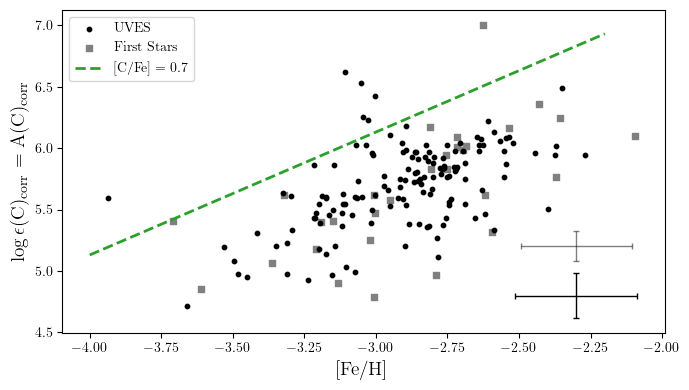

In [9]:
plt.figure(figsize=(7,4), dpi=100)

# plt.scatter(uves.query('is_limit_c == False and ec_sme < 0.25').feh.values, uves.query('is_limit_c == False and ec_sme < 0.25').cfe.values, s=10, color='k')
# plt.scatter(uves.query('source_id == 6167441439259305088').feh, uves.query('source_id == 6167441439259305088').cfe, s=20, color='C2', marker='s')

# plt.title(r'${\rm Pritsine\,-\,UVES\ -\ \sigma(C) < 0.25}$', size=14)

plt.scatter(uves.query('is_limit_c == False and ec_sme < 0.75').feh.values,
            uves.query('is_limit_c == False and ec_sme < 0.75').c.values + uves.query('is_limit_c == False and ec_sme < 0.75').monh.values \
            + uves.query('is_limit_c == False and ec_sme < 0.75').carbon_correction_03.values, s=10, color='k', label=r'${\rm UVES}$')
plt.scatter(cayrel.query('ec_sme < 1.').feh.values,
            cayrel.query('ec_sme < 1.').c.values + cayrel.query('ec_sme < 1.').monh.values + cayrel.query('ec_sme < 1.').carbon_correction_03.values, 
            s=25, color='grey', zorder=0, marker='s', label=r'${\rm First\ Stars}$')

plt.errorbar(-2.3, 4.8, color='k', xerr=np.median(uves.efe_sme.values)*0.9, yerr=np.median(uves.ec_sme.values), lw=1, capsize=2.5)
plt.errorbar(-2.3, 5.2, color='k', xerr=np.median(cayrel.efe_sme.values)*0.9, yerr=np.median(cayrel.ec_sme.values), lw=1, alpha=0.5, capsize=2.5)

plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm \log\epsilon (C)_{corr} = A(C)_{corr}}$', size=14)

x = np.linspace(-4.0, -2.2)
plt.plot(x, solar.abund.get_element('C') + x + 0.7, ls='--', color='C2', label=r'${\rm [C/Fe] = 0.7}$', lw=2)

plt.legend()
plt.tight_layout()
plt.savefig('plots/UVES_feh_cfe.pdf', dpi=300)
plt.show()

In [6]:
#Plot 11: CN fits

In [24]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [66]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves['cfe'] = uves.c.values - solar.abund.get_element('C')
uves['nfe_nh'] = uves.n_nh.values - solar.abund.get_element('N')
uves['nfe_cn'] = uves.n_cn.values - solar.abund.get_element('N')

In [67]:
uves.query('cfe + carbon_correction_03 > 0.7').spec_id

58     4450279330676186368_3576301_057
83     6167441439259305088_3573234_046
90     6312184792070759552_3573694_092
94     6425379106130933376_3573700_088
137    6758510681005269632_3573228_051
146    6844413467195214720_3572816_028
Name: spec_id, dtype: object

In [78]:
spec_id = '6312184792070759552_3573694_092'
spec = uves.query('spec_id == "%s"' %spec_id)
sme_c = SME_Structure.load('sme_save/UVES_cfe_%s.sme' %spec_id)
sme_n_nh = SME_Structure.load('sme_save/UVES_nfe_nh_%s.sme' %spec_id)
sme_n_cn = SME_Structure.load('sme_save/UVES_nfe_cn_%s.sme' %spec_id)
# sme_n = SME_Structure.load('sme_save/UVES_nfe_%s.sme' %spec_id)

INFO - Loading SME file sme_save/UVES_cfe_6312184792070759552_3573694_092.sme
INFO - Loading SME file sme_save/UVES_nfe_nh_6312184792070759552_3573694_092.sme
INFO - Loading SME file sme_save/UVES_nfe_cn_6312184792070759552_3573694_092.sme


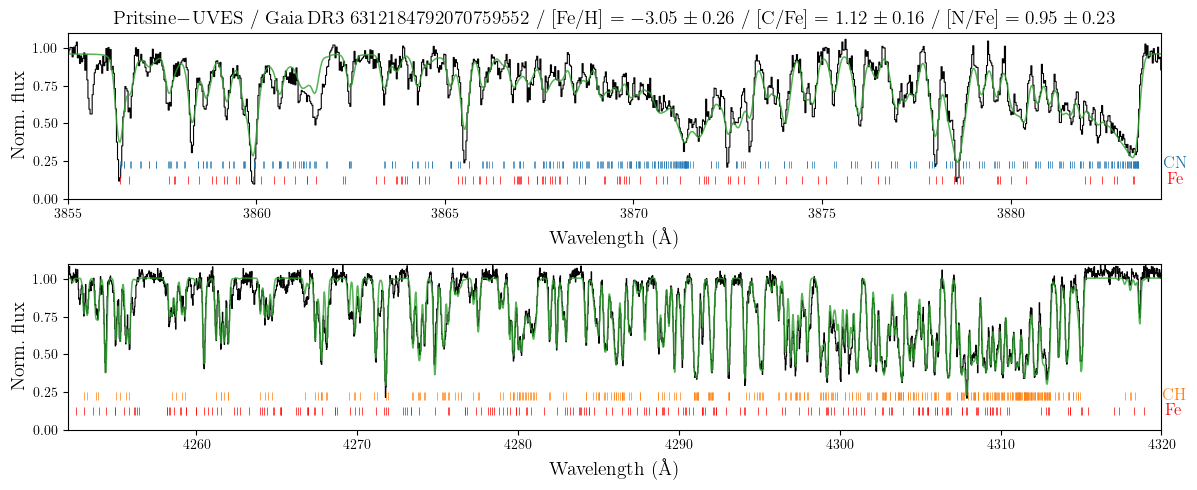

In [107]:
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(2,1,1)
plt.title(r'${\rm Pritsine{-}UVES\ /\ Gaia\,DR3\ %s\ /\ [Fe/H] = %2.2f\pm%2.2f\ /\ [C/Fe] = %2.2f\pm%2.2f\ /\ [N/Fe] = %2.2f\pm%2.2f}$' %(spec.source_id.values[0], spec.feh.values[0], 
                                                                                                               spec.efe_sme.values[0]*0.9, spec.cfe.values[0] + spec.carbon_correction_03.values[0], 
                                                                                                               spec.ec_sme.values[0], spec.nfe_cn.values[0] - 0.4, spec.en_cn_sme.values[0] ), size=14)

plt.step(sme_n_cn.wave.data, sme_n_cn.spec.data, lw=0.8, color='k', alpha=0.99, where='mid')
plt.plot(sme_n_cn.wave.data, sme_n_cn.synth.data, lw=1.1, color='C2', alpha=0.8)

elems_to_include = ['CN 1']
for wline, species, depth in pd.DataFrame(sme_n_cn.linelist)[['wlcent', 'species', 'depth']].values:
    if (species == 'Fe 1') | (species == 'Fe 2'):
        plt.vlines(wline, 0.10, 0.15, color='r', lw=0.5)
    if species not in elems_to_include:
        continue
    plt.vlines(wline, 0.2, 0.25, color='C0', lw=0.5)

plt.xlim(3855, 3884)
plt.ylim(0.0, 1.1)

plt.text(x=3884.05, y=0.20, s=r'${\rm CN}$', color='C0', size=12)
plt.text(x=3884.15, y=0.10, s=r'${\rm Fe}$', color='r', size=12)

plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=14)
plt.ylabel(r'${\rm Norm.\ flux}$', size=14)

plt.subplot(2,1,2)

plt.step(sme_c.wave.data, sme_c.spec.data, lw=0.8, color='k', alpha=0.99, where='mid')
plt.plot(sme_c.wave.data, sme_c.synth.data, lw=1.1, color='C2', alpha=0.8)

elems_to_include = ['CH 1']
for wline, species, depth in pd.DataFrame(sme_c.linelist)[['wlcent', 'species', 'depth']].values:
    if (species == 'Fe 1') | (species == 'Fe 2'):
        plt.vlines(wline, 0.10, 0.15, color='r', lw=0.5)
    if species not in elems_to_include:
        continue
    plt.vlines(wline, 0.2, 0.25, color='C1', lw=0.5)

plt.xlim(4252, 4320)
plt.ylim(0.0, 1.1)

plt.text(x=4320.05, y=0.20, s=r'${\rm CH}$', color='C1', size=12)
plt.text(x=4320.25, y=0.10, s=r'${\rm Fe}$', color='r', size=12)

plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=14)
plt.ylabel(r'${\rm Norm.\ flux}$', size=14)

plt.tight_layout()
plt.savefig('plots/UVES_CN_spec.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [105]:
uves.query('source_id == 6312184792070759552')[['cfe', 'carbon_correction_03', 'nfe_cn', 'nfe_nh']]

,cfe,carbon_correction_03,nfe_cn,nfe_nh
90,0.494979,0.63,1.353334,1.6833


In [67]:
#Plot 12: Cayrel comparison of alpha elements

In [68]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_alpha_elements.csv')

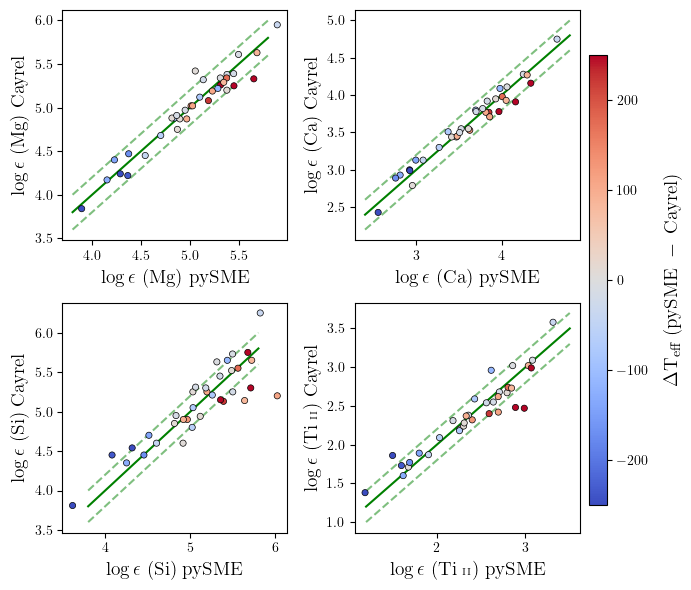

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=100)

cmap = plt.cm.coolwarm
delta_teff = cayrel.teff.values - cayrel.teff_cayrel.values

plt.subplot(2,2,1)
scatter  = plt.scatter(cayrel.logeMg.values, cayrel.logeMg_c04.values + 0.25, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
# plt.errorbar(cayrel.logeMg.values, cayrel.logeMg_c04.values + 0.22, fmt='k.', xerr=cayrel.emgfe_c04.values, lw=1, zorder=0) # yerr=cayrel.emg_rms.values
x = np.linspace(3.8, 5.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Mg)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Mg)\ Cayrel}$', size=14)

plt.subplot(2,2,2)
plt.scatter(cayrel.logeCa.values, cayrel.logeCa_c04.values + 0.06, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(2.4, 4.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Ca)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Ca)\ Cayrel}$', size=14)

plt.subplot(2,2,3)
plt.scatter(cayrel.logeSi.values, cayrel.logeSi_c04.values + 0.25, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(3.8, 5.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Si)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Si)\ Cayrel}$', size=14)

plt.subplot(2,2,4)
plt.scatter(cayrel.logeTi2.values, cayrel.logeTi2_c04.values + 0.30, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(1.2, 3.5)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Ti\ _{^{II}})\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Ti\ _{^{II}})\ Cayrel}$', size=14)

cbar_ax = fig.add_axes([0.99, 0.15, 0.03, 0.75]) #[left, bottom, width, height]
cb = fig.colorbar(scatter, cax=cbar_ax)
cb.set_label(r'${\rm \Delta T_{eff}\ (pySME\ -\ Cayrel)}$', labelpad=10, fontsize=14)

plt.tight_layout()
plt.savefig('plots/UVES_alpha_elements_comparison.pdf', bbox_inches='tight', dpi=100)
plt.show()

In [83]:
np.mean(cayrel.logeTi2.values - cayrel.logeTi2_c04.values)

0.30687114435723145

In [25]:
#Plot 13: Cayrel comparison of iron-peak elements

In [26]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_lelements.csv')
cayrel.drop_duplicates(subset='spec_id', keep='first', inplace=True)

In [27]:
#UVES pysme merged files read and merge
cayrel_co_merged = pd.read_csv('abunds_merged/cayrel_lines_co1_merged.csv')
cayrel_cr1_merged = pd.read_csv('abunds_merged/cayrel_lines_cr1_merged.csv')
cayrel_cr2_merged = pd.read_csv('abunds_merged/cayrel_lines_cr2_merged.csv')
cayrel_mn_merged = pd.read_csv('abunds_merged/cayrel_lines_mn1_merged.csv')
cayrel_mn_nlte_merged = pd.read_csv('abunds_merged/cayrel_lines_mn1_nlte_merged.csv')
cayrel_ni_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_ni1_merged.csv')
cayrel_v_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_v2_merged.csv')
cayrel_zn_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_zn1_merged.csv')
cayrel = cayrel.merge(right=cayrel_co_merged, on='spec_id').merge(right=cayrel_cr1_merged, on='spec_id').merge(right=cayrel_cr2_merged, on='spec_id').merge(right=cayrel_mn_merged, on='spec_id')
cayrel = cayrel.merge(right=cayrel_mn_nlte_merged, on='spec_id').merge(right=cayrel_ni_merged_nlte, on='spec_id').merge(right=cayrel_v_merged_nlte, on='spec_id').merge(right=cayrel_zn_merged_nlte, on='spec_id')

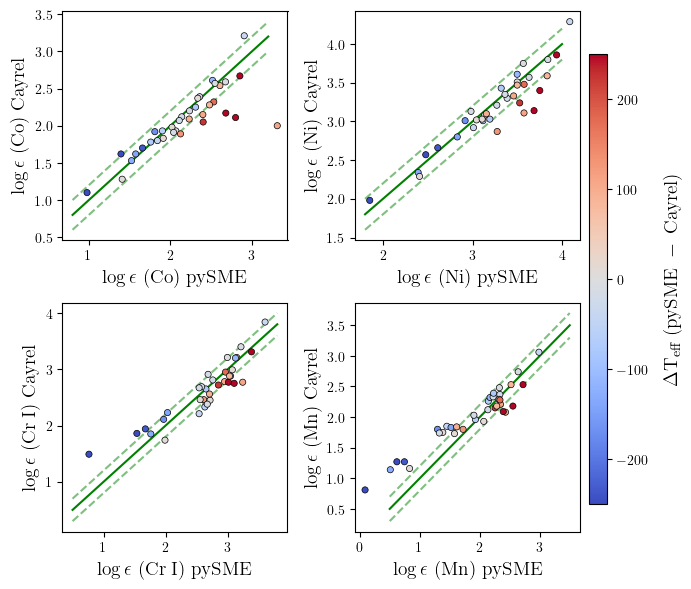

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=100)

cmap = plt.cm.coolwarm
delta_teff = cayrel.teff.values - cayrel.teff_cayrel.values

plt.subplot(2,2,1)
scatter  = plt.scatter(cayrel.logeCo.values, cayrel.logeCo_c04.values, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(0.8, 3.2)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Co)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Co)\ Cayrel}$', size=14)

plt.subplot(2,2,2)
plt.scatter(cayrel.logeNi.values, cayrel.logeNi_c04.values + 0.1, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(1.8, 4.0)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Ni)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Ni)\ Cayrel}$', size=14)

plt.subplot(2,2,3)
plt.scatter(cayrel.logeCr.values, cayrel.logeCr_c04.values + 0.45, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(0.5, 3.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Cr\ I)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Cr\ I)\ Cayrel}$', size=14)

plt.subplot(2,2,4)
plt.scatter(cayrel.logeMn.values, cayrel.logeMn_c04.values + 0.20, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(0.5, 3.5)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Mn)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Mn)\ Cayrel}$', size=14)

# plt.subplot(3,2,5)
# plt.scatter(cayrel.logeSc.values, cayrel.logeSc_c04.values + 0.25, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
# x = np.linspace(-1.0, 1.2)
# plt.plot(x,x, color='g', zorder=0)
# plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
# plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
# plt.xlabel(r'${\rm \log\epsilon\ (Sc)\ pySME}$', size=14)
# plt.ylabel(r'${\rm \log\epsilon\ (Sc)\ Cayrel}$', size=14)

# plt.subplot(3,2,6)
# plt.scatter(cayrel.logeAl.values, cayrel.logeAl_c04.values + 0.25, c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
# x = np.linspace(1.8, 4.5)
# plt.plot(x,x, color='g', zorder=0)
# plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
# plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
# plt.xlabel(r'${\rm \log\epsilon\ (Al)\ pySME}$', size=14)
# plt.ylabel(r'${\rm \log\epsilon\ (Al)\ Cayrel}$', size=14)
# plt.xticks([])
# plt.yticks([])
# plt.axis('off')

cbar_ax = fig.add_axes([0.99, 0.15, 0.03, 0.75]) #[left, bottom, width, height]
cb = fig.colorbar(scatter, cax=cbar_ax)
cb.set_label(r'${\rm \Delta T_{eff}\ (pySME\ -\ Cayrel)}$', labelpad=10, fontsize=14)

plt.tight_layout()
plt.savefig('plots/UVES_iron_elements_comparison.pdf', bbox_inches='tight', dpi=100)
plt.show()

In [5]:
#Plot 14: Cayrel comparison of neutron-capture elements

In [6]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [7]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_lelements.csv')
cayrel.drop_duplicates(subset='spec_id', keep='first', inplace=True)

In [8]:
cayrel_nelements = pd.read_csv('cayrel/FirstStars_elements.dat', delim_whitespace=True, comment='#')
cayrel_nelements.columns = cayrel_nelements.columns.str.strip()
cayrel_nelements['spec_id'] = cayrel_nelements['spec_id'].str.strip()

ba_andre = pd.read_csv('cayrel/Ba_measurements_andrievsky.dat', delim_whitespace=True, skiprows=1, names=['spec_id','teff_a09','logg_a09','vt_a09','feh_a09','ba_lte_a09',
                                                                                              'ba_nlte_a09','bah_nlte_a09','bafe_nlte_a09','n_lines_a09','is_limit_ba_a09'])
sr_andre = pd.read_csv('cayrel/Sr_measurements_andrievsky.dat', delim_whitespace=True, skiprows=1, names=['spec_id','teff_a11','logg_a11','vt_a11','feh_a11','esr_a11',
                                                                                              'srh_a11', 'srfe_a11','bah_a11', 'n_lines_a11','is_limit_sr_a11'])

In [9]:
#Merge all cayrels into one:
cayrel = cayrel.merge(right=cayrel_nelements, on='spec_id').merge(right=ba_andre, on='spec_id').merge(right=sr_andre, on='spec_id')

In [10]:
#Cayrel pysme merged files read and merge
cayrel_sr_merged = pd.read_csv('abunds_merged/cayrel_lines_sr2_merged.csv')
cayrel_y_merged = pd.read_csv('abunds_merged/cayrel_lines_y2_merged.csv')
cayrel_zr_merged = pd.read_csv('abunds_merged/cayrel_lines_zr2_merged.csv')
cayrel_ba_merged = pd.read_csv('abunds_merged/cayrel_lines_ba2_merged.csv')
# cayrel_la_merged = pd.read_csv('abunds_merged/cayrel_lines_la_merged.csv')
cayrel_ce_merged = pd.read_csv('abunds_merged/cayrel_lines_ce2_merged.csv')
cayrel_eu_merged = pd.read_csv('abunds_merged/cayrel_lines_eu2_merged.csv')
# cayrel_pr_merged = pd.read_csv('abunds_merged/cayrel_lines_pr_merged.csv')
cayrel_nd_merged = pd.read_csv('abunds_merged/cayrel_lines_nd2_merged.csv')
cayrel_sm_merged = pd.read_csv('abunds_merged/cayrel_lines_sm2_merged.csv')
cayrel_gd_merged = pd.read_csv('abunds_merged/cayrel_lines_gd2_merged.csv')
cayrel_dy_merged = pd.read_csv('abunds_merged/cayrel_lines_dy2_merged.csv')

cayrel = cayrel.merge(right=cayrel_sr_merged, on='spec_id').merge(right=cayrel_y_merged, on='spec_id').merge(right=cayrel_zr_merged, on='spec_id').merge(right=cayrel_ba_merged, on='spec_id')
cayrel = cayrel.merge(right=cayrel_ce_merged, on='spec_id').merge(right=cayrel_eu_merged, on='spec_id').merge(right=cayrel_nd_merged, on='spec_id').merge(right=cayrel_sm_merged, on='spec_id')
cayrel = cayrel.merge(right=cayrel_gd_merged, on='spec_id').merge(right=cayrel_dy_merged, on='spec_id')

In [11]:
ba_andre.columns

Index(['spec_id', 'teff_a09', 'logg_a09', 'vt_a09', 'feh_a09', 'ba_lte_a09',
       'ba_nlte_a09', 'bah_nlte_a09', 'bafe_nlte_a09', 'n_lines_a09',
       'is_limit_ba_a09'],
      dtype='object')

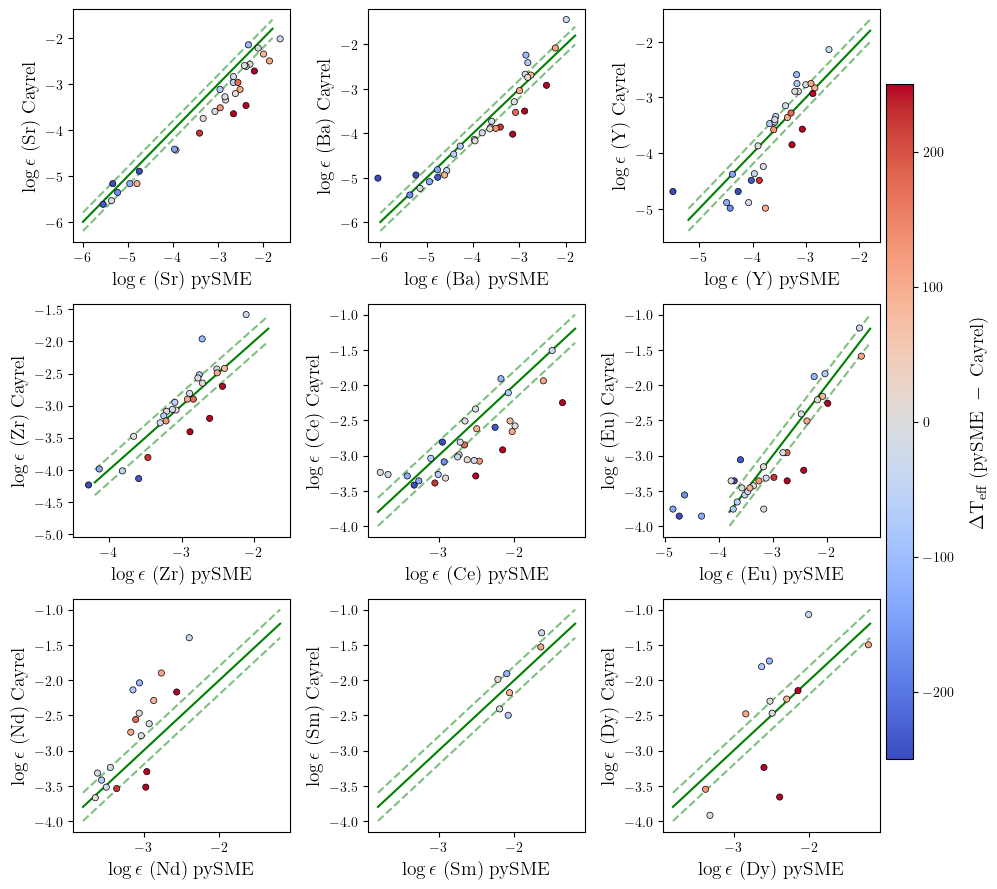

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9,9), dpi=100)

cmap = plt.cm.coolwarm
delta_teff = cayrel.teff.values - cayrel.teff_cayrel.values

plt.subplot(3,3,1)
scatter  = plt.scatter(cayrel.sr2.values - solar.abund.get_element('Sr') + cayrel.monh.values, cayrel.srfe.values + cayrel.feh.values - (2.87 - 2.92) - (7.50 - 7.45), 
                       c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-6.0, -1.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Sr)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Sr)\ Cayrel}$', size=14)

plt.subplot(3,3,2)
scatter  = plt.scatter(cayrel.ba2.values - solar.abund.get_element('Ba') + cayrel.monh.values, cayrel.bafe.values + cayrel.feh.values  - (2.18 - 2.17) - (7.50 - 7.45), 
                       c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-6.0, -1.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Ba)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Ba)\ Cayrel}$', size=14)

plt.subplot(3,3,3)
scatter  = plt.scatter(cayrel.y2.values*0.75 - solar.abund.get_element('Y') + cayrel.monh.values, cayrel.yfe.values + cayrel.feh.values  - (2.21 - 2.21) - (7.50 - 7.45), 
                       c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-5.2, -1.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Y)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Y)\ Cayrel}$', size=14)

plt.subplot(3,3,4)
scatter  = plt.scatter(cayrel.zr2.values*0.85 - solar.abund.get_element('Zr') + cayrel.monh.values, cayrel.zrfe.values + cayrel.feh.values  - (2.58 - 2.59) - (7.50 - 7.45), 
                       c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-4.2, -1.8)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Zr)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Zr)\ Cayrel}$', size=14)
plt.xlim(-4.5, -1.5)

plt.subplot(3,3,5)
scatter  = plt.scatter(cayrel.ce2.values - solar.abund.get_element('Ce') + cayrel.monh.values, cayrel.cefe.values + cayrel.feh.values  - (1.58 - 1.70) - (7.50 - 7.45), 
                       c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-3.8, -1.2)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Ce)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Ce)\ Cayrel}$', size=14)

plt.subplot(3,3,6)
scatter  = plt.scatter(cayrel.eu2.values - solar.abund.get_element('Eu') + cayrel.monh.values, cayrel.eufe.values + cayrel.feh.values  - (0.52 - 0.52) - (7.50 - 7.45), 
                       c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-3.8, -1.2)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Eu)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Eu)\ Cayrel}$', size=14)

plt.subplot(3,3,7)
scatter  = plt.scatter(cayrel.nd2.values[~cayrel.is_limit_nd.values]*0.40 - solar.abund.get_element('Nd') + cayrel.monh.values[~cayrel.is_limit_nd.values], 
                       cayrel.ndfe.values[~cayrel.is_limit_nd.values] + cayrel.feh.values[~cayrel.is_limit_nd.values]  - (1.42 - 1.45) - (7.50 - 7.45), 
                       c=delta_teff[~cayrel.is_limit_nd.values], cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-3.8, -1.2)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Nd)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Nd)\ Cayrel}$', size=14)

plt.subplot(3,3,8)
scatter  = plt.scatter(cayrel.sm2.values[~cayrel.is_limit_sm.values]*0.7 - solar.abund.get_element('Sm') + cayrel.monh.values[~cayrel.is_limit_sm.values], 
                       cayrel.smfe.values[~cayrel.is_limit_sm.values] + cayrel.feh.values[~cayrel.is_limit_sm.values]  - (0.96 - 1.01) - (7.50 - 7.45), 
                       c=delta_teff[~cayrel.is_limit_sm.values], cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-3.8, -1.2)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Sm)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Sm)\ Cayrel}$', size=14)

# plt.subplot(3,3,9)
# scatter  = plt.scatter(cayrel.gd2.values - solar.abund.get_element('Gd') + cayrel.monh.values, cayrel.gdfe.values + cayrel.feh.values  - (1.07 - 1.12) - (7.50 - 7.45), 
#                        c=delta_teff, cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
# x = np.linspace(-3.8, -1.2)
# plt.plot(x,x, color='g', zorder=0)
# plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
# plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
# plt.xlabel(r'${\rm \log\epsilon\ (Gd)\ pySME}$', size=14)
# plt.ylabel(r'${\rm \log\epsilon\ (Gd)\ Cayrel}$', size=14)


plt.subplot(3,3,9)
scatter  = plt.scatter(cayrel.dy2.values[~cayrel.is_limit_dy.values]*0.30 - solar.abund.get_element('Dy') + cayrel.monh.values[~cayrel.is_limit_dy.values], 
                       cayrel.dyfe.values[~cayrel.is_limit_dy.values] + cayrel.feh.values[~cayrel.is_limit_dy.values]  - (1.10 - 1.14) - (7.50 - 7.45), 
                       c=delta_teff[~cayrel.is_limit_dy.values], cmap=plt.cm.coolwarm, s=20, edgecolors='k', lw=0.5, vmin=-250, vmax=250)
x = np.linspace(-3.8, -1.2)
plt.plot(x,x, color='g', zorder=0)
plt.plot(x,x+0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.plot(x,x-0.2, color='g', zorder=0, ls='--', alpha=0.5)
plt.xlabel(r'${\rm \log\epsilon\ (Dy)\ pySME}$', size=14)
plt.ylabel(r'${\rm \log\epsilon\ (Dy)\ Cayrel}$', size=14)

cbar_ax = fig.add_axes([0.99, 0.15, 0.03, 0.75]) #[left, bottom, width, height]
cb = fig.colorbar(scatter, cax=cbar_ax)
cb.set_label(r'${\rm \Delta T_{eff}\ (pySME\ -\ Cayrel)}$', labelpad=10, fontsize=14)

plt.tight_layout()
plt.savefig('plots/UVES_neutron_capture_elements_comparison.pdf', bbox_inches='tight', dpi=100)
plt.show()

In [7]:
#Calcium trends with wavelength

In [8]:
ca = pd.read_csv('tmp_merged/uves_ca_merged_lines.csv', names=['spec_id','species','wl_line','excit','gflog','ca','eca_sme','eca_fit','n_iter_ca'], comment='s')
ca.drop_duplicates(subset=['spec_id', 'wl_line'], inplace=True, ignore_index=True, keep='first')
ca.reset_index(inplace=True)

In [9]:
ca_unique_lines, ca_unique_lines_counts = np.unique(ca.wl_line.values, return_counts=True)
ca_ref = ca.query('wl_line == %4.2f' %ca_unique_lines[-14]).ca.values

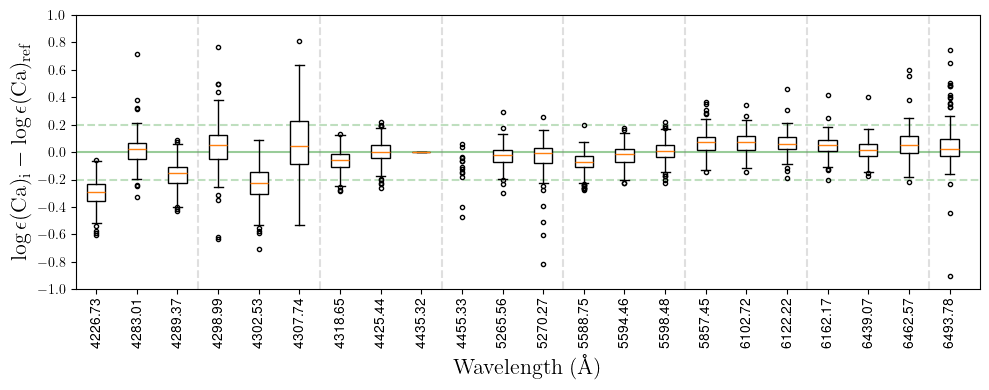

In [22]:
plt.figure(figsize=(10,4), dpi=100)

for n_line, wl_line in enumerate(ca_unique_lines):
    abunds = ca.query('wl_line == %4.2f' %ca_unique_lines[n_line])
    abunds.reset_index(inplace=True)
    # eabunds = mg.query('wl_line == %4.2f' %mg_unique_lines[n_line]).emg_sme.values
    # wl = mg.query('wl_line == %4.2f' %mg_unique_lines[n_line]).wl_line.values
    
    bplot = plt.boxplot(np.vstack((abunds.ca.values-ca_ref[abunds.index.values])), positions = [n_line], sym='.', widths=0.45, whis=1.5, showmeans=False, patch_artist=True)
    for patch in bplot['boxes']:
        patch.set_facecolor('w')

plt.xticks(np.arange(0, ca_unique_lines.size), ca_unique_lines, rotation=90)
plt.ylabel(r'${\rm \log\epsilon(Ca)_i - \log\epsilon(Ca)_{ref}}$', size=16)
plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=16)
plt.ylim(-3, 3)
plt.ylim(-1, 1)
plt.xlim(1.50, 23.75)
plt.hlines([-0.20, 0.20], -1, 24, zorder=0, color='g', alpha=0.25, ls='--', lw=1.5)
plt.hlines(0.0, -1, 24, zorder=-1, color='g', alpha=0.4, ls='-', lw=1.5)
plt.yticks(ticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.vlines([np.arange(24)[1::3]+0.5], -1, 1, zorder=0, color='grey', alpha=0.25, ls='--')

plt.tight_layout()
plt.savefig('plots/UVES_Ca_abund_wave.pdf', dpi=100)
plt.show()

In [13]:
np.around(5001.10, decimals=2)

5001.1

In [11]:
#Galactic trends: alpha-elements

In [12]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [39]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_lelements.csv')
cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe')
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves.drop_duplicates(subset='source_id', keep='first', inplace=True)

In [40]:
#Prepare Mittal & Roederer 2025 data

mittal25 = pd.read_fwf('data_to_compare/mittal25.txt', col_widths=[12-1,20-14,29-22,35-31,40-37,46-42], skiprows=16, 
                       names=['star_id_1', 'star_id_2', 'atom', 'ion', 'wl_line', 'EW_mA', 'loge', 'NLTE_correction'])
mittal25.NLTE_correction.fillna(value=0.0, inplace=True)
mittal25.ion.fillna(value='', inplace=True)
mittal25['star_id'] = mittal25.star_id_1.values + mittal25.star_id_2.values
mittal25['elem'] = mittal25.atom.values + mittal25.ion.values
mittal25['loge_nlte'] = mittal25.loge.values + mittal25.NLTE_correction.values
mittal25.drop(columns=['star_id_1', 'star_id_2', 'atom', 'ion', 'EW_mA', 'NLTE_correction'], inplace=True)
mittal25 = mittal25[['star_id', 'elem', 'wl_line', 'loge', 'loge_nlte']]

mittal25_merged = mittal25.drop(columns=['wl_line']).groupby(by=['star_id', 'elem']).agg({'loge':['median', 'std'], 'loge_nlte':['median', 'std']})

mittal25_fe = mittal25_merged.query('elem == "FeI"').merge(mittal25_merged.query('elem == "FeII"'), on='star_id', suffixes=['_fe1', '_fe2'])
mittal25_mgca = mittal25_merged.query('elem == "Mg"').merge(mittal25_merged.query('elem == "Ca"'), on='star_id', suffixes=['_mg', '_ca'])
mittal25_ti = mittal25_merged.query('elem == "TiI"').merge(mittal25_merged.query('elem == "TiII"'), on='star_id', suffixes=['_ti1', '_ti2'])

mittal25 = mittal25_fe.merge(mittal25_mgca, on='star_id').merge(mittal25_ti, on='star_id')

In [41]:
#Prepare Cayrel and UVES data

cayrel_mg_merged = pd.read_csv('abunds_merged/cayrel_lines_mg1_merged.csv')
cayrel_ca_merged = pd.read_csv('abunds_merged/cayrel_lines_ca1_merged.csv')
cayrel_ti1_merged = pd.read_csv('abunds_merged/cayrel_lines_ti1_merged.csv')
cayrel_ti2_merged = pd.read_csv('abunds_merged/cayrel_lines_ti2_merged.csv')
cayrel_mg_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_mg1_nlte_merged.csv')
cayrel_ca_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_ca1_nlte_merged.csv')
cayrel_ti1_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_ti1_nlte_merged.csv')
cayrel_ti2_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_ti2_nlte_merged.csv')
cayrel = cayrel.merge(right=cayrel_mg_merged, on='spec_id').merge(right=cayrel_mg_merged_nlte, on='spec_id')
cayrel = cayrel.merge(right=cayrel_ca_merged, on='spec_id').merge(right=cayrel_ca_merged_nlte, on='spec_id')
cayrel = cayrel.merge(right=cayrel_ti1_merged, on='spec_id').merge(right=cayrel_ti1_merged_nlte, on='spec_id')
cayrel = cayrel.merge(right=cayrel_ti2_merged, on='spec_id').merge(right=cayrel_ti2_merged_nlte, on='spec_id')

mg_merged = pd.read_csv('abunds_merged/uves_lines_mg1_merged.csv')
ca_merged = pd.read_csv('abunds_merged/uves_lines_ca1_merged.csv')
ti1_merged = pd.read_csv('abunds_merged/uves_lines_ti1_merged.csv')
ti2_merged = pd.read_csv('abunds_merged/uves_lines_ti2_merged.csv')
mg_merged_nlte = pd.read_csv('abunds_merged/uves_lines_mg1_nlte_merged.csv')
ca_merged_nlte = pd.read_csv('abunds_merged/uves_lines_ca1_nlte_merged.csv')
ti1_merged_nlte = pd.read_csv('abunds_merged/uves_lines_ti1_nlte_merged.csv')
ti2_merged_nlte = pd.read_csv('abunds_merged/uves_lines_ti2_nlte_merged.csv')
uves = uves.merge(right=mg_merged, on='spec_id').merge(right=mg_merged_nlte, on='spec_id')
uves = uves.merge(right=ca_merged, on='spec_id').merge(right=ca_merged_nlte, on='spec_id')
uves = uves.merge(right=ti1_merged, on='spec_id').merge(right=ti1_merged_nlte, on='spec_id')
uves = uves.merge(right=ti2_merged, on='spec_id').merge(right=ti2_merged_nlte, on='spec_id')

In [42]:
#Extra filters if necessary:
uves = uves.query('emg1_nlte_rms < 1.0 and mg1_nlte > 7.0')

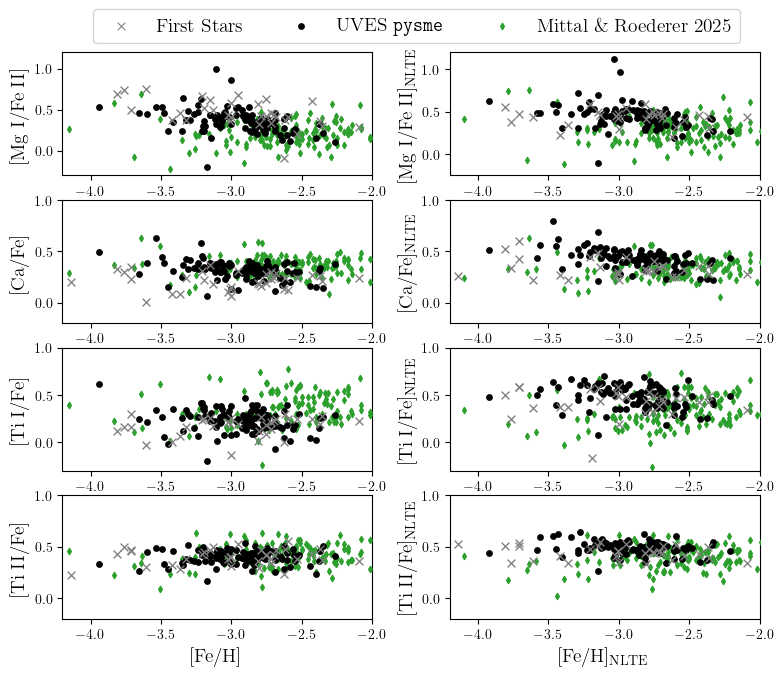

In [69]:
plt.figure(figsize=(9,7.5), dpi=100)

plt.subplots_adjust(wspace=0.25)

plt.subplot(4,2,1)
plt.scatter(cayrel.feh.values, cayrel.mg1.values - solar.abund.get_element('Mg') - cayrel.fe.values + cayrel.fe2.values, s=30, color='grey', marker='x', zorder=9, label=r'${\rm First\ Stars}$', lw=0.75)
plt.scatter(uves.feh.values, uves.mg1.values - solar.abund.get_element('Mg') - uves.fe.values + uves.fe2.values - 0.22, s=15, color='k', zorder=8, label=r'${\rm UVES\ {\tt pysme}}$')
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_mg['median'].values - mittal25.loge_fe2['median'].values - (solar.abund.get_element('Mg') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d', label=r'${\rm Mittal\ \&\ Roederer\ 2025}$', lw=1)
plt.legend(loc='upper left', bbox_to_anchor=(0.1, 1.35), ncol=3, borderaxespad=0., prop={'size': 14})
plt.xlim(-4.2, -2.0)
plt.ylim(-0.3, 1.2)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Mg\ I/Fe\ II]}$', size=14)

plt.subplot(4,2,2)
plt.scatter(uves.fe_nlte.values + uves.monh.values -solar.abund.get_element('Fe'), uves.mg1_nlte.values - solar.abund.get_element('Mg') - uves.fe.values + uves.fe2.values - 0.22, s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.mg1_nlte.values - solar.abund.get_element('Mg'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_nlte_mg['median'].values - solar.abund.get_element('Mg')\
            - (mittal25.loge_nlte_fe2['median'].values - solar.abund.get_element('Fe')), s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.25, 1.2)
plt.xlabel(r'${\rm [Fe/H]_{NLTE}}$', size=14)
plt.ylabel(r'${\rm [Mg\ I/Fe\ II]_{NLTE}}$', size=14)

plt.subplot(4,2,3)
plt.scatter(uves.feh.values, uves.ca1.values - solar.abund.get_element('Ca'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.ca1.values - solar.abund.get_element('Ca'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_ca['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Ca') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.2, 1.0)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Ca/Fe]}$', size=14)

plt.subplot(4,2,4)
plt.scatter(uves.fe_nlte.values + uves.monh.values -solar.abund.get_element('Fe'), uves.ca1_nlte.values - solar.abund.get_element('Ca'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.ca1_nlte.values - solar.abund.get_element('Ca'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_nlte_ca['median'].values - solar.abund.get_element('Ca')\
            - (mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe')), s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.2, 1.0)
plt.xlabel(r'${\rm [Fe/H]_{NLTE}}$', size=14)
plt.ylabel(r'${\rm [Ca/Fe]_{NLTE}}$', size=14)

plt.subplot(4,2,5)
plt.scatter(uves.feh.values, uves.ti1.values - solar.abund.get_element('Ti'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.ti1.values - solar.abund.get_element('Ti'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_ti1['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Ti') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.3, 1.0)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Ti\ I/Fe]}$', size=14)

plt.subplot(4,2,6)
plt.scatter(uves.fe_nlte.values + uves.monh.values -solar.abund.get_element('Fe'), uves.ti1_nlte.values - solar.abund.get_element('Ti'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.ti1_nlte.values - solar.abund.get_element('Ti'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_nlte_ti1['median'].values - solar.abund.get_element('Ti')\
            - (mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe')), s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.3, 1.0)
plt.xlabel(r'${\rm [Fe/H]_{NLTE}}$', size=14)
plt.ylabel(r'${\rm [Ti\ I/Fe]_{NLTE}}$', size=14)


plt.subplot(4,2,7)
plt.scatter(uves.feh.values, uves.ti2.values - solar.abund.get_element('Ti'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.ti2.values - solar.abund.get_element('Ti'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_ti2['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Ti') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.2, 1.0)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Ti\ II/Fe]}$', size=14)

plt.subplot(4,2,8)
plt.scatter(uves.fe_nlte.values + uves.monh.values -solar.abund.get_element('Fe'), uves.ti2_nlte.values - solar.abund.get_element('Ti'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.ti2_nlte.values - solar.abund.get_element('Ti'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_nlte_ti2['median'].values - solar.abund.get_element('Ti')\
            - (mittal25.loge_nlte_fe1['median'].values - solar.abund.get_element('Fe')), s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.2, 1.0)
plt.xlabel(r'${\rm [Fe/H]_{NLTE}}$', size=14)
plt.ylabel(r'${\rm [Ti\ II/Fe]_{NLTE}}$', size=14)

# plt.tight_layout()
plt.savefig('plots/UVES_alphas_feh_trends.pdf', dpi=100)
plt.show()

In [77]:
#Galactic trends: odd-Z elements

In [93]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [120]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_lelements.csv')
cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe')
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves.drop_duplicates(subset='source_id', keep='first', inplace=True)

In [121]:
#Prepare Cayrel and UVES data

cayrel_al_merged = pd.read_csv('abunds_merged/cayrel_lines_al1_merged.csv')
cayrel_na_merged = pd.read_csv('cayrel/Cayrel_light_elements.csv').query('species == "Na"').drop(columns=['feh_c04','species','is_limit_am','am','is_limit_afe','afe','eafe','nlines_c04'])
cayrel_na_merged = cayrel_na_merged.rename(columns={'loge':'na1'})
cayrel = cayrel.merge(right=cayrel_al_merged, on='spec_id').merge(right=cayrel_na_merged, on='spec_id')
cayrel['na1'] = cayrel.na1.values - cayrel.monh.values

al_merged = pd.read_csv('abunds_merged/uves_lines_al1_merged.csv')
na_merged = pd.read_csv('abunds_merged/uves_lines_na1_merged.csv')
sc_merged = pd.read_csv('abunds_merged/uves_lines_sc2_merged.csv')
uves = uves.merge(right=al_merged, on='spec_id').merge(right=na_merged, on='spec_id').merge(right=sc_merged, on='spec_id')

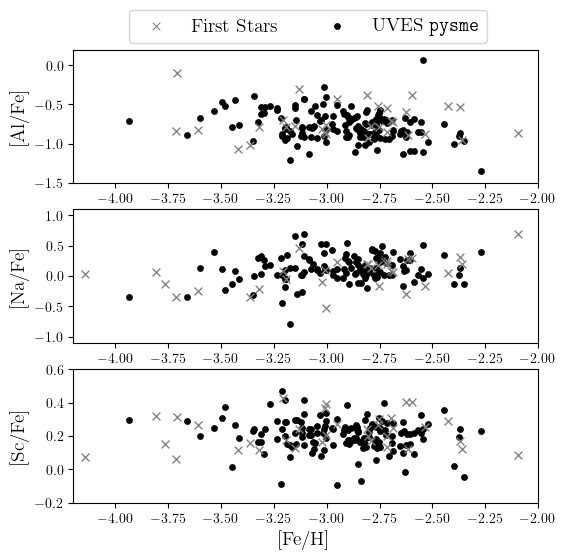

In [132]:
plt.figure(figsize=(6, 6), dpi=100)

plt.subplots_adjust(wspace=0.25, hspace=0.20)

plt.subplot(3,1,1)
plt.scatter(cayrel.feh.values, cayrel.al1.values - solar.abund.get_element('Al'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(uves.feh.values, uves.al1.values - solar.abund.get_element('Al'), s=15, color='k', zorder=8)
plt.ylim(-1.5, 0.2)

plt.xlim(-4.2, -2.0)
# plt.ylim(-0.3, 1.5)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Al/Fe]}$', size=14)

plt.subplot(3,1,2)
plt.scatter(cayrel.feh.values, cayrel.na1.values - solar.abund.get_element('Na'), s=30, color='grey', marker='x', zorder=9, lw=0.75, label=r'${\rm First\ Stars}$')
plt.scatter(uves.feh.values[(uves.na1.values < 7.0) & (uves.ena1_rms.values < 0.8)], uves.na1.values[(uves.na1.values < 7.0) & (uves.ena1_rms.values < 0.8)] - solar.abund.get_element('Na'), s=15, color='k', zorder=8)

plt.xlim(-4.2, -2.0)
plt.ylim(-1.1, 1.1)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Na/Fe]}$', size=14)
plt.yticks([-1., -0.5, 0, 0.5, 1.])

plt.subplot(3,1,3)
plt.scatter(cayrel.feh.values, cayrel.sc.values - solar.abund.get_element('Sc'), s=30, color='grey', marker='x', zorder=9, lw=0.75, label=r'${\rm First\ Stars}$')
plt.scatter(uves.feh.values, uves.sc2.values - solar.abund.get_element('Sc'), s=15, color='k', zorder=8, label=r'${\rm UVES\ {\tt pysme}}$')
plt.legend(loc='upper left', bbox_to_anchor=(0.12, 3.7), ncol=3, borderaxespad=0., prop={'size': 14})

plt.xlim(-4.2, -2.0)
plt.ylim(-0.2, 0.6)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Sc/Fe]}$', size=14)

plt.tight_layout()
plt.savefig('plots/UVES_oddZ_feh_trends.pdf', dpi=100)
plt.show()

In [23]:
#Galactic trends: iron-peak

In [189]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [228]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_lelements.csv')
cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe')
cayrel.drop_duplicates(subset='spec_id', keep='first', inplace=True)
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')

In [229]:
#UVES pysme merged files read and merge
co_merged = pd.read_csv('abunds_merged/uves_lines_co1_merged.csv')
cr1_merged = pd.read_csv('abunds_merged/uves_lines_cr1_merged.csv')
cr2_merged = pd.read_csv('abunds_merged/uves_lines_cr2_merged.csv')
mn_merged = pd.read_csv('abunds_merged/uves_lines_mn1_merged.csv')
mn_nlte_merged = pd.read_csv('abunds_merged/uves_lines_mn1_nlte_merged.csv')
ni_merged_nlte = pd.read_csv('abunds_merged/uves_lines_ni1_merged.csv')
v_merged_nlte = pd.read_csv('abunds_merged/uves_lines_v2_merged.csv')
zn_merged_nlte = pd.read_csv('abunds_merged/uves_lines_zn1_merged.csv')
uves = uves.merge(right=co_merged, on='spec_id').merge(right=cr1_merged, on='spec_id').merge(right=cr2_merged, on='spec_id').merge(right=ni_merged_nlte, on='spec_id')
uves = uves.merge(right=mn_merged, on='spec_id').merge(right=mn_nlte_merged, on='spec_id').merge(right=v_merged_nlte, on='spec_id').merge(right=zn_merged_nlte, on='spec_id')

cayrel_co_merged = pd.read_csv('abunds_merged/cayrel_lines_co1_merged.csv')
cayrel_cr1_merged = pd.read_csv('abunds_merged/cayrel_lines_cr1_merged.csv')
cayrel_cr2_merged = pd.read_csv('abunds_merged/cayrel_lines_cr2_merged.csv')
cayrel_mn_merged = pd.read_csv('abunds_merged/cayrel_lines_mn1_merged.csv')
cayrel_mn_nlte_merged = pd.read_csv('abunds_merged/cayrel_lines_mn1_nlte_merged.csv')
cayrel_ni_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_ni1_merged.csv')
cayrel_v_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_v2_merged.csv')
cayrel_zn_merged_nlte = pd.read_csv('abunds_merged/cayrel_lines_zn1_merged.csv')
cayrel = cayrel.merge(right=cayrel_co_merged, on='spec_id').merge(right=cayrel_cr1_merged, on='spec_id').merge(right=cayrel_cr2_merged, on='spec_id').merge(right=cayrel_mn_merged, on='spec_id')
cayrel = cayrel.merge(right=cayrel_mn_nlte_merged, on='spec_id').merge(right=cayrel_ni_merged_nlte, on='spec_id').merge(right=cayrel_v_merged_nlte, on='spec_id').merge(right=cayrel_zn_merged_nlte, on='spec_id')

In [230]:
# Mittal & Roederer 2025 abundance preparation 
mittal25 = pd.read_fwf('data_to_compare/mittal25.txt', col_widths=[12-1,20-14,29-22,35-31,40-37,46-42], skiprows=16, 
                       names=['star_id_1', 'star_id_2', 'atom', 'ion', 'wl_line', 'EW_mA', 'loge', 'NLTE_correction'])
mittal25.NLTE_correction.fillna(value=0.0, inplace=True)
mittal25.ion.fillna(value='', inplace=True)
mittal25['star_id'] = mittal25.star_id_1.values + mittal25.star_id_2.values
mittal25['elem'] = mittal25.atom.values + mittal25.ion.values
mittal25['loge_nlte'] = mittal25.loge.values + mittal25.NLTE_correction.values
mittal25.drop(columns=['star_id_1', 'star_id_2', 'atom', 'ion', 'EW_mA', 'NLTE_correction'], inplace=True)
mittal25 = mittal25[['star_id', 'elem', 'wl_line', 'loge', 'loge_nlte']]

mittal25_merged = mittal25.drop(columns=['wl_line']).groupby(by=['star_id', 'elem']).agg({'loge':['median', 'std'], 'loge_nlte':['median', 'std']})

mittal25_fe = mittal25_merged.query('elem == "FeI"').merge(mittal25_merged.query('elem == "FeII"'), on='star_id', suffixes=['_fe1', '_fe2'])
mittal25_mgca = mittal25_merged.query('elem == "Mg"').merge(mittal25_merged.query('elem == "Ca"'), on='star_id', suffixes=['_mg', '_ca'])
mittal25_ti = mittal25_merged.query('elem == "TiI"').merge(mittal25_merged.query('elem == "TiII"'), on='star_id', suffixes=['_ti1', '_ti2'])

mittal25_cr = mittal25_merged.query('elem == "CrI"').merge(mittal25_merged.query('elem == "CrII"'), on='star_id', suffixes=['_cr1', '_cr2'])
mittal25_nizn = mittal25_merged.query('elem == "Ni"').merge(mittal25_merged.query('elem == "Zn"'), on='star_id', suffixes=['_ni', '_zn'])

mittal25 = mittal25_fe.merge(mittal25_mgca, on='star_id').merge(mittal25_ti, on='star_id').merge(mittal25_cr, on='star_id').merge(mittal25_nizn, on='star_id')

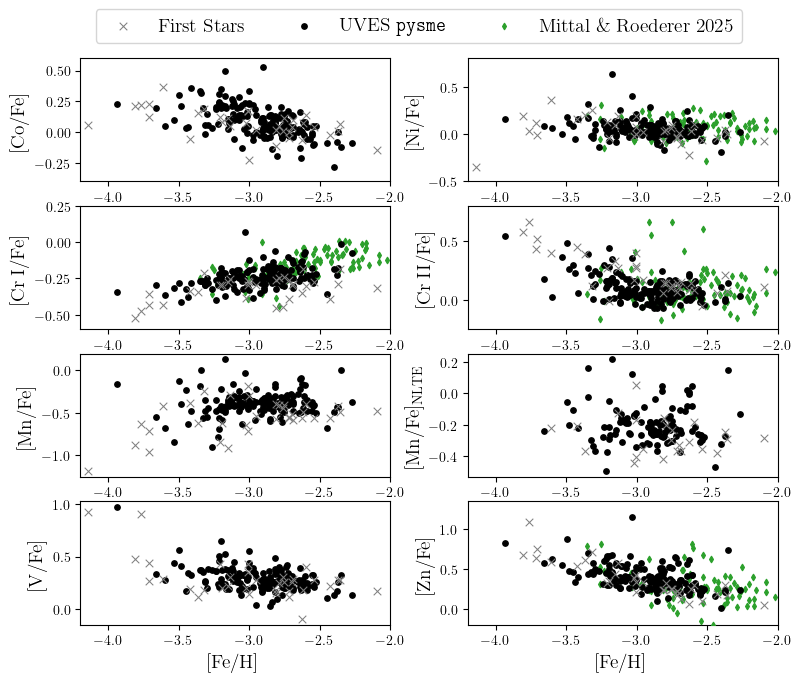

In [232]:
plt.figure(figsize=(9,7.5), dpi=100)

plt.subplots_adjust(wspace=0.25)

plt.subplot(4,2,1)
plt.scatter(uves.feh.values, uves.co1.values - solar.abund.get_element('Co'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.co1.values - solar.abund.get_element('Co'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.xlim(-4.2, -2.0)
plt.ylim(-0.4, 0.6)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Co/Fe]}$', size=14)

plt.subplot(4,2,2)
plt.scatter(cayrel.feh.values, cayrel.ni1.values - solar.abund.get_element('Ni'), s=30, color='grey', marker='x', zorder=9, lw=0.75, label=r'${\rm First\ Stars}$')
plt.scatter(uves.feh.values, uves.ni1.values - solar.abund.get_element('Ni'), s=15, color='k', zorder=8, label=r'${\rm UVES\ {\tt pysme}}$')
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_ni['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Ni') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d', label=r'${\rm Mittal\ \&\ Roederer\ 2025}$')
plt.legend(loc='upper left', bbox_to_anchor=(-1.2, 1.4), ncol=3, borderaxespad=0., prop={'size': 14})
plt.xlim(-4.2, -2.0)
plt.ylim(-0.5, 0.8)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Ni/Fe]}$', size=14)

plt.subplot(4,2,3)
plt.scatter(uves.feh.values, uves.cr1.values - solar.abund.get_element('Cr'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.cr1.values - solar.abund.get_element('Cr'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_cr1['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Cr') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.6, 0.25)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Cr\ I/Fe]}$', size=14)

plt.subplot(4,2,4)
plt.scatter(uves.feh.values, 0.25 + uves.cr2.values - solar.abund.get_element('Cr'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.cr2.values - solar.abund.get_element('Cr'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_cr2['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Cr') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.25, 0.8)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Cr\ II/Fe]}$', size=14)

plt.subplot(4,2,5)
plt.scatter(uves.feh.values, uves.mn1.values - solar.abund.get_element('Mn'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.mn1.values - solar.abund.get_element('Mn'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.xlim(-4.2, -2.0)
# plt.ylim(-1.0, 0.5)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Mn/Fe]}$', size=14)

plt.subplot(4,2,6)
plt.scatter(uves.feh.values[(uves.emn1_nlte_rms.values < 0.5) & (uves.mn1_nlte.values - solar.abund.get_element('Mn') > -0.5)], 
            uves.mn1_nlte.values[(uves.emn1_nlte_rms.values < 0.5) & (uves.mn1_nlte.values - solar.abund.get_element('Mn') > -0.5)] - solar.abund.get_element('Mn'), s=15, color='k')
plt.scatter(cayrel.feh.values[(cayrel.emn1_nlte_rms.values < 0.5) & (cayrel.mn1_nlte.values - solar.abund.get_element('Mn') > -0.5)], 
            cayrel.mn1_nlte.values[(cayrel.emn1_nlte_rms.values < 0.5) & (cayrel.mn1_nlte.values - solar.abund.get_element('Mn') > -0.5)] - solar.abund.get_element('Mn'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.xlim(-4.2, -2.0)
# plt.ylim(-1.0, 0.5)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Mn/Fe]_{NLTE}}$', size=14)

plt.subplot(4,2,7)
plt.scatter(uves.feh.values, uves.v2.values - solar.abund.get_element('V'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.v2.values - solar.abund.get_element('V'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.xlim(-4.2, -2.0)
# plt.ylim(-0.2, 1.0)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [V/Fe]}$', size=14)

plt.subplot(4,2,8)
plt.scatter(uves.feh.values, uves.zn1.values - solar.abund.get_element('Zn'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.zn1.values - solar.abund.get_element('Zn'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.scatter(mittal25.loge_fe1['median'].values - solar.abund.get_element('Fe'), 
            mittal25.loge_zn['median'].values - mittal25.loge_fe1['median'].values - (solar.abund.get_element('Zn') - solar.abund.get_element('Fe')), 
            s=10, color='C2', zorder=7, marker='d')
plt.xlim(-4.2, -2.0)
plt.ylim(-0.2, 1.35)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Zn/Fe]}$', size=14)

# plt.tight_layout()
plt.savefig('plots/UVES_iron_feh_trends.pdf', dpi=100)
plt.show()

In [5]:
#Galactic trends: neutron-capture

In [6]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [7]:
cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr_lelements.csv')
cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe')
# ba_andre = pd.read_csv('cayrel/Ba_measurements_andrievsky.dat', delim_whitespace=True, skiprows=1, names=['spec_id','teff_a09','logg_a09','vt_a09','feh_a09','ba_lte_a09',
#                                                                                               'ba_nlte_a09','bah_nlte_a09','bafe_nlte_a09','n_lines_a09','is_limit_ba_a09'])
# sr_andre = pd.read_csv('cayrel/Sr_measurements_andrievsky.dat', delim_whitespace=True, skiprows=1, names=['spec_id','teff_a11','logg_a11','vt_a11','feh_a11','esr_a11',
#                                                                                               'srh_a11', 'srfe_a11','bah_a11', 'n_lines_a11','is_limit_sr_a11'])
eu_merged = pd.read_csv('abunds_merged/cayrel_lines_eu2_merged.csv')
sr_merged = pd.read_csv('abunds_merged/cayrel_lines_sr2_merged.csv')
ba_merged = pd.read_csv('abunds_merged/cayrel_lines_ba2_merged.csv')
cayrel = cayrel.merge(right=ba_merged, on='spec_id').merge(right=sr_merged, on='spec_id').merge(right=eu_merged, on='spec_id')

uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')

In [8]:
eu_merged = pd.read_csv('abunds_merged/uves_lines_eu2_merged.csv')
sr_merged = pd.read_csv('abunds_merged/uves_lines_sr2_merged.csv')
ba_merged = pd.read_csv('abunds_merged/uves_lines_ba2_merged.csv')

In [9]:
uves = uves.merge(right=eu_merged, on='spec_id').merge(right=sr_merged, on='spec_id').merge(right=ba_merged, on='spec_id')

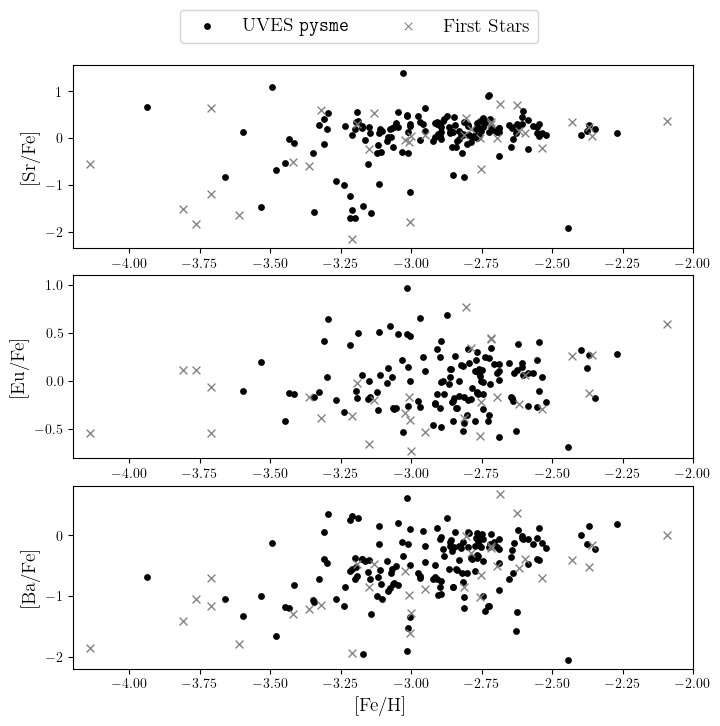

In [10]:
plt.figure(figsize=(8,8), dpi=100)

plt.subplots_adjust(hspace=0.15)

plt.subplot(3,1,1)
plt.scatter(uves.feh.values[uves.esr2_sme.values < 1], uves.sr2.values[uves.esr2_sme.values < 1] - solar.abund.get_element('Sr'), s=15, color='k', zorder=8, label=r'${\rm UVES\ {\tt pysme}}$')
# plt.scatter(cayrel.feh.values, cayrel.srfe_a11.values, s=15, color='grey', marker='s', zorder=0, label=r'${\rm First\ Stars}$')
plt.scatter(cayrel.feh.values, cayrel.sr2.values - solar.abund.get_element('Sr'), s=30, color='grey', marker='x', zorder=9, lw=0.75, label=r'${\rm First\ Stars}$')
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Sr/Fe]}$', size=14)
plt.legend(bbox_to_anchor=(0.75, 1.3), ncol=2, borderaxespad=0., prop={'size': 14})
plt.xlim(-4.2, -2.0)

plt.subplot(3,1,2)
plt.scatter(uves.feh.values[uves.eeu2_sme.values < 1], uves.eu2.values[uves.eeu2_sme.values < 1] - solar.abund.get_element('Eu'), s=15, color='k', zorder=8)
plt.scatter(cayrel.feh.values, cayrel.eu2.values - solar.abund.get_element('Eu'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.xlim(-4.2, -2.0)
plt.ylim(-0.8, 1.1)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Eu/Fe]}$', size=14)

plt.subplot(3,1,3)
plt.scatter(uves.feh.values, uves.ba2.values - solar.abund.get_element('Ba'), s=15, color='k', zorder=8)
# plt.scatter(cayrel.feh.values, cayrel.bafe_nlte_a09.values, s=15, color='grey', marker='s', zorder=0)
plt.scatter(cayrel.feh.values, cayrel.ba2.values - solar.abund.get_element('Ba'), s=30, color='grey', marker='x', zorder=9, lw=0.75)
plt.xlabel(r'${\rm [Fe/H]}$', size=14)
plt.ylabel(r'${\rm [Ba/Fe]}$', size=14)
plt.xlim(-4.2, -2.0)

# plt.tight_layout()
plt.savefig('plots/UVES_neutron_feh_trends.pdf', dpi=100)
plt.show()

In [24]:
#Plot Vanessa ELz Ba

In [158]:
from matplotlib.patches import Ellipse

In [49]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [133]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves['feh_nlte'] = uves.fe_nlte.values + uves.monh.values - solar.abund.get_element('Fe')

eu_merged = pd.read_csv('abunds_merged/uves_lines_eu2_merged.csv')
sr_merged = pd.read_csv('abunds_merged/uves_lines_sr2_merged.csv')
ba_merged = pd.read_csv('abunds_merged/uves_lines_ba2_merged.csv')

mg_merged = pd.read_csv('abunds_merged/uves_lines_mg1_merged.csv')
mg_merged_nlte = pd.read_csv('abunds_merged/uves_lines_mg1_nlte_merged.csv')

uves = uves.merge(right=eu_merged, on='spec_id').merge(right=sr_merged, on='spec_id').merge(right=ba_merged, on='spec_id')
uves = uves.merge(right=mg_merged, on='spec_id').merge(right=mg_merged_nlte, on='spec_id')

uves['mgfe'] = uves.mg1.values - solar.abund.get_element('Mg')
uves['mgfe_nlte'] = uves.mg1_nlte.values - solar.abund.get_element('Mg')
uves['bafe'] = uves.ba2.values - solar.abund.get_element('Ba')
uves['srfe'] = uves.sr2.values - solar.abund.get_element('Sr')
uves['eufe'] = uves.eu2.values - solar.abund.get_element('Eu')

In [134]:
agama_orbits = pd.read_csv('orbits/UVES_orbits_agama.csv')
ages = pd.read_csv('ages/Ages_UVES_ages_28102024.csv')
ages.drop(columns=['source_id'], inplace=True)
ages['spec_id'] = uves.spec_id

In [135]:
uves = uves.merge(right=agama_orbits, on='spec_id').merge(right=ages, on='spec_id')

In [136]:
uves['norm_age'] = uves.age_specgbrjhk_nobayes_nosalaris.values - np.nanmean(uves.age_specgbrjhk_nobayes_nosalaris.values)

In [137]:
from astropy.io import fits
from astropy.table import Table

nn = fits.open('orbits/apogee_astroNN-DR17.fits')
nn = Table(nn[1].data).to_pandas()
nn.dropna(axis=0, inplace=True)

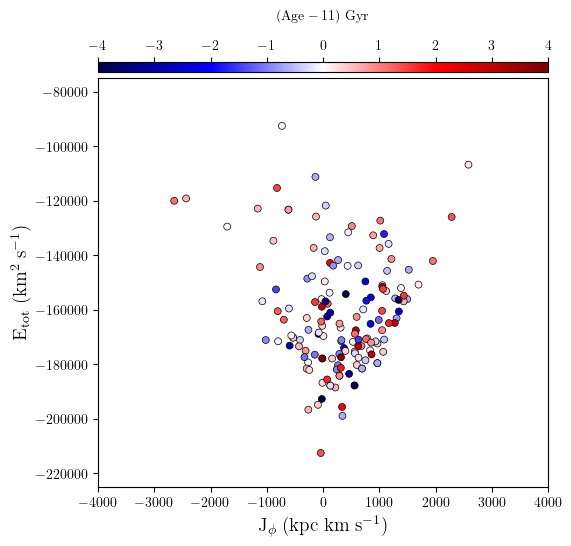

In [138]:
fig = plt.figure(figsize=(5,5), dpi=100)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[0.025, 1])
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.25, hspace=0.03)

cmap = plt.cm.seismic
ages = uves.norm_age.values
vmin, vmax = -4, 4

ax1 = plt.subplot(gs[1,0])
plt1 = ax1.scatter(uves.Jphi.values, uves.E.values, s=25, c=ages, cmap=cmap, vmin=vmin, vmax=vmax, ec='k', lw=0.5)
ax1.set_xlabel(r'${\rm J_\phi\ (kpc\ km\ s^{-1})}$', size=14)
ax1.set_ylabel(r'${\rm E_{tot}\ (km^{2}\ s^{-1})}$', size=14)
ax1.set_xlim(-4000, 4000)
ax1.set_ylim(-225000, -75000)

cb = plt.subplot(gs[0,0])
cb = Colorbar(ax = cb, mappable = plt1, orientation = 'horizontal', ticklocation = 'top')
cb.set_label(r'${\rm (Age-11)\ Gyr}$', labelpad=14)

# plt.tight_layout()
# plt.savefig('plots/UVES_orbits_diamond_BaMg.pdf', dpi=300, bbox_inches='tight')
plt.show()

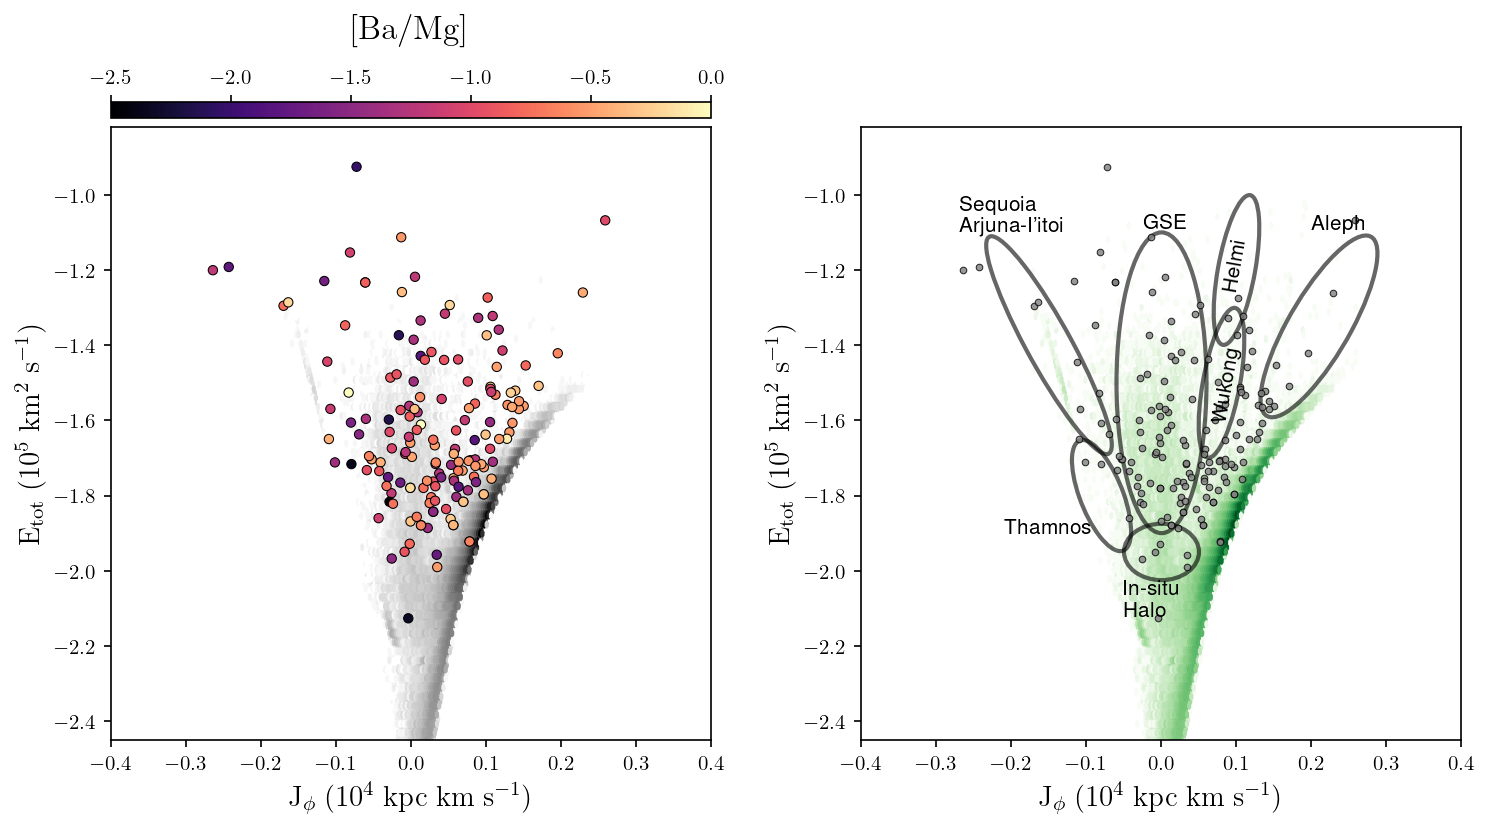

In [234]:
fig = plt.figure(figsize=(10,5), dpi=150)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[0.025, 1])
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.25, hspace=0.03)

cmap = plt.cm.magma
abund = uves.bafe.values - uves.mgfe.values
vmin, vmax = -2.5, 0.0

ax1 = plt.subplot(gs[1,0]) 
ax1.hexbin((nn.Lz.values/2)/1e4, (nn.Energy.values-150000)/1e5, gridsize=150, bins='log', cmap=plt.cm.Greys)
plt1 = ax1.scatter(uves.Jphi.values/1e4, uves.E.values/1e5, s=20, c=abund, cmap=cmap, vmin=vmin, vmax=vmax, ec='k', lw=0.5)
ax1.set_xlabel(r'${\rm J_\phi\ (10^4\ kpc\ km\ s^{-1})}$', size=14)
ax1.set_ylabel(r'${\rm E_{tot}\ (10^5\ km^{2}\ s^{-1})}$', size=14)
ax1.set_xlim(-4000/1e4, 4000/1e4)
ax1.set_ylim(-245000/1e5, -82000/1e5)

cb = plt.subplot(gs[0,0])
cb = Colorbar(ax = cb, mappable = plt1, orientation = 'horizontal', ticklocation = 'top')
cb.set_label(r'${\rm [Ba/Mg]}$', labelpad=14, fontsize=16)


ax2 = plt.subplot(gs[1,1]) 
ax2.hexbin((nn.Lz.values/2)/1e4, (nn.Energy.values-150000)/1e5, gridsize=150, bins='log', cmap=plt.cm.Greens)
ax2.scatter(uves.Jphi.values/1e4, uves.E.values/1e5, s=10, color='grey', ec='k', lw=0.5, alpha=0.8, zorder=8)
ax2.set_xlabel(r'${\rm J_\phi\ (10^4\ kpc\ km\ s^{-1})}$', size=14)
ax2.set_ylabel(r'${\rm E_{tot}\ (10^5\ km^{2}\ s^{-1})}$', size=14)
ax2.set_xlim(-4000/1e4, 4000/1e4)
ax2.set_ylim(-245000/1e5, -82000/1e5)

x_factor, x_scale = 10., 0.0
y_factor, y_scale = 1.0, -0.30

ges = Ellipse(xy=(0.0/x_factor + x_scale, -1.2/y_factor + y_scale), width=1.2/10, height=0.8, angle=0, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_patch(ges)
wuk = Ellipse(xy=(0.8/x_factor + x_scale, -1.2/y_factor + y_scale), width=0.5/10, height=0.4, angle=-5, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_artist(wuk)
hel = Ellipse(xy=(1.0/x_factor + x_scale, -0.9/y_factor + y_scale), width=0.5/10, height=0.4, angle=-5, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_artist(hel)
ale = Ellipse(xy=(2.1/x_factor + x_scale, -1.05/y_factor + y_scale), width=0.9/10, height=0.5, angle=-15, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_artist(ale)
ish = Ellipse(xy=(0.0/x_factor + x_scale, -1.65/y_factor + y_scale), width=1.0/10, height=0.15, angle=0, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_artist(ish)
seq = Ellipse(xy=(-1.5/x_factor + x_scale, -1.1/y_factor + y_scale), width=0.65/10, height=0.6, angle=15, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_artist(seq)
tha = Ellipse(xy=(-0.8/x_factor + x_scale, -1.5/y_factor + y_scale), width=0.6/10, height=0.3, angle=10, facecolor='none', lw=2, edgecolor='k', alpha=0.6)
ax2.add_artist(tha)

plt.text(x=-2.7/x_factor + x_scale, y=-0.8/y_factor + y_scale, s='Sequoia \n Arjuna-I\'itoi', fontsize=10, color='k', zorder=9, weight='black')
plt.text(x=-0.25/x_factor + x_scale, y=-0.79/y_factor + y_scale, s='GSE', fontsize=10, color='k', zorder=9, weight='black')
plt.text(x=2.0/x_factor + x_scale, y=-0.79/y_factor + y_scale, s='Aleph', fontsize=10, color='k', zorder=9, weight='black')
plt.text(x=0.80/x_factor + x_scale, y=-0.95/y_factor + y_scale, s='Helmi', fontsize=10, color='k', rotation=80, zorder=9, weight='black')
plt.text(x=0.65/x_factor + x_scale, y=-1.3/y_factor + y_scale, s='Wukong', fontsize=10, color='k', rotation=80, zorder=9, weight='black')
plt.text(x=-2.1/x_factor + x_scale, y=-1.60/y_factor + y_scale, s='Thamnos', fontsize=10, color='k', zorder=9, weight='black')
plt.text(x=-0.5/x_factor + x_scale, y=-1.82/y_factor + y_scale, s='In-situ \n Halo', fontsize=10, color='k', zorder=9, weight='black')

# plt.tight_layout()
plt.savefig('plots/UVES_orbits_ELz_BaMg.pdf', dpi=300, bbox_inches='tight')
plt.show()

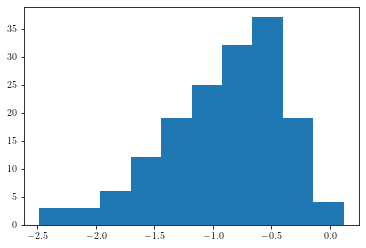

In [147]:
plt.hist(abund)
plt.show()

In [6]:
#Extra plot: Gaia Day @ OCA

In [15]:
os.chdir('/home/fgran/iSpec/')
import ispec
os.chdir('/store/teams/cosmos/fgran/data/Pristine-UVES/')

In [16]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [71]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
uves.sort_values(by='feh', ascending=True, inplace=True)
uves = uves.query('4800 < teff < 4900')
uves.reset_index(drop=True, inplace=True)

In [72]:
uves.ra.size

22

In [73]:
idx_mp = uves.index.values[::2]
feh_sample = uves.feh.values[idx_mp]
run_id_sample = uves.run.values[idx_mp]
blue_spec_id_sample = uves.blue_file.values[idx_mp]

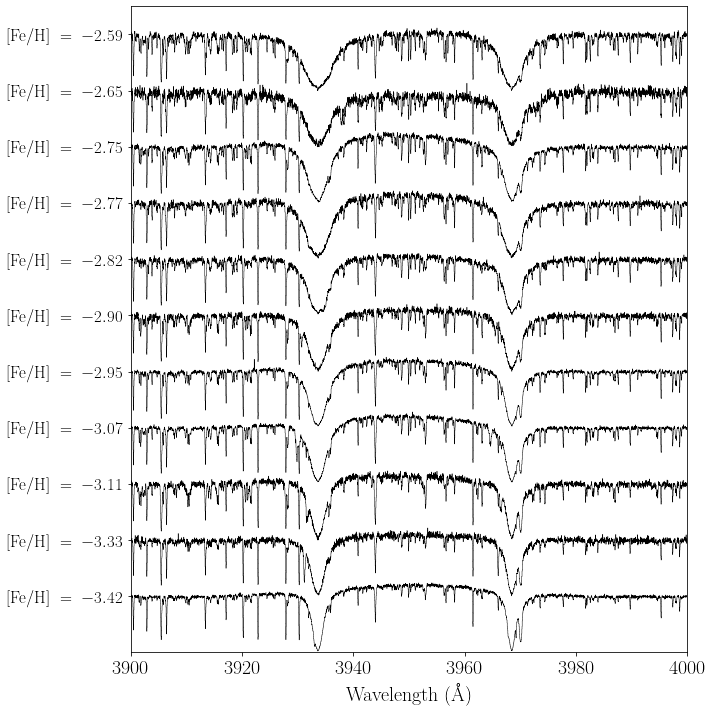

CPU times: user 933 ms, sys: 1.71 s, total: 2.64 s
Wall time: 28.2 s


In [79]:
%%time

plt.figure(figsize=(10, 10))
wl_min, wl_max = 3900, 4000

for i, (run_id, blue_file) in enumerate(zip(run_id_sample, blue_spec_id_sample)):

    spec = ispec.read_spectrum('norm_RV_corr/%s/blue_%s' %(run_id, blue_file))
    plt.step(spec.waveobs*10., spec.flux + i, lw=0.5, color='k')
    
plt.xlim(wl_min, wl_max)
plt.ylim(0, feh_sample.size+0.5)
plt.xlabel(r'${\rm Wavelength\ (\AA)}$', size=20)
plt.xticks(size = 20)
plt.yticks(np.arange(0, feh_sample.size, 1)+1, labels=[r'${\rm [Fe/H]\ =\ %2.2f}$' %fe for fe in feh_sample], fontsize=17)

plt.tight_layout()
plt.savefig('plots/UVES_CaHK_GaiaDay.pdf', dpi=100)
plt.show()

In [8]:
#Extra plot: Nadege Li

In [20]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [21]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
li = pd.read_csv('tmp_merged/UVES_li.csv')
uves = uves.merge(right=li, on='spec_id')

uves['eli_6100'] = 0.5*(uves.eli_up_6100.values + uves.eli_down_6100.values)
uves['eli_6700'] = 0.5*(uves.eli_up_6700.values + uves.eli_down_6700.values)

uves.drop_duplicates(subset=['source_id'], keep='first', inplace=True)

uves['is_limit_li'] = False
uves['is_limit_li'][uves.li_6700.values < 0.35] = True

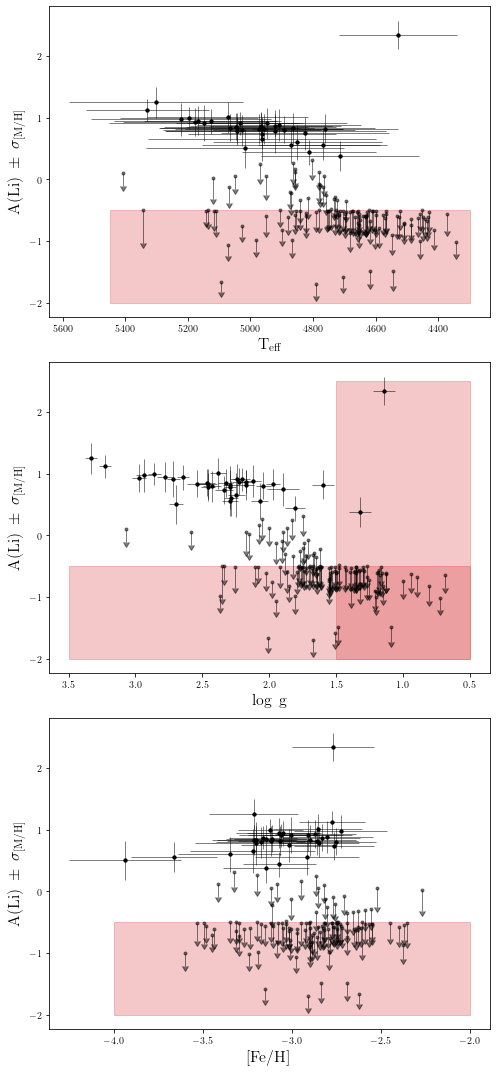

In [23]:
plt.figure(figsize=(7, 15))

plt.subplot(3,1,1)
plt.scatter(uves.query('is_limit_li == False').teff.values, uves.query('is_limit_li == False').li_6700.values, s=10, color='k', zorder=9)
plt.errorbar(uves.query('is_limit_li == False').teff.values, uves.query('is_limit_li == False').li_6700.values, fmt='k.', 
             xerr=uves.query('is_limit_li == False').eteff_sme.values, yerr=uves.query('is_limit_li == False').emonh_sme.values, lw=1, alpha=0.5)
plt.errorbar(uves.query('is_limit_li == True').teff.values, uves.query('is_limit_li == True').li_6700.values, fmt='k.', 
             lw=1, alpha=0.5, yerr=uves.query('is_limit_li == True').emonh_sme.values, 
             uplims=np.ones_like(uves.query('is_limit_li == True').eteff_sme.values).astype(bool))

plt.fill_between(x = [5450, 4300], y1 = -2, y2 = -0.5, zorder=0, color='C3', alpha=0.25)
# plt.scatter(uves.query('logg < 3.0 and logg > 2.6 and li_6700 > 0.75').teff.values, uves.query('logg < 3.0 and logg > 2.6 and li_6700 > 0.75').li_6700.values, s=25, color='C4', zorder=9, edgecolors='k')
plt.gca().invert_xaxis()
plt.xlabel(r'${\rm T_{eff}}$', size=16)
plt.ylabel(r'${\rm A(Li)\ \pm\ \sigma_{[M/H]} }$', size=16)

plt.subplot(3,1,2)
plt.scatter(uves.query('is_limit_li == False').logg.values, uves.query('is_limit_li == False').li_6700.values, s=10, color='k', zorder=9)
plt.errorbar(uves.query('is_limit_li == False').logg.values, uves.query('is_limit_li == False').li_6700.values, fmt='k.', 
             xerr=uves.query('is_limit_li == False').elogg_sme.values, yerr=uves.query('is_limit_li == False').emonh_sme.values, lw=1, alpha=0.5)
plt.errorbar(uves.query('is_limit_li == True').logg.values, uves.query('is_limit_li == True').li_6700.values, fmt='k.', 
             lw=1, alpha=0.5, yerr=uves.query('is_limit_li == True').emonh_sme.values, 
             uplims=np.ones_like(uves.query('is_limit_li == True').elogg_sme.values).astype(bool))

plt.fill_between(x = [3.5, 0.5], y1 = -2, y2 = -0.5, zorder=0, color='C3', alpha=0.25)
plt.fill_betweenx(y = [-2, 2.5], x1 = 0.5, x2 = 1.5, zorder=0, color='C3', alpha=0.25)
# plt.scatter(uves.query('logg < 3.0 and logg > 2.6 and li_6700 > 0.75').logg.values, uves.query('logg < 3.0 and logg > 2.6 and li_6700 > 0.75').li_6700.values, s=25, color='C4', zorder=9, edgecolors='k')
# plt.scatter(uves.query('feh < -3.3').logg.values, uves.query('feh < -3.3').li_6700.values, s=50, color='g', zorder=9, edgecolors='k')
plt.gca().invert_xaxis()

plt.xlabel(r'${\rm \log\ g}$', size=16)
plt.ylabel(r'${\rm A(Li)\ \pm\ \sigma_{[M/H]} }$', size=16)

plt.subplot(3,1,3)
plt.scatter(uves.query('is_limit_li == False').feh.values, uves.query('is_limit_li == False').li_6700.values, s=10, color='k', zorder=9)
plt.errorbar(uves.query('is_limit_li == False').feh.values, uves.query('is_limit_li == False').li_6700.values, fmt='k.', 
             xerr=uves.query('is_limit_li == False').emonh_sme.values, yerr=uves.query('is_limit_li == False').emonh_sme.values, lw=1, alpha=0.5)
plt.errorbar(uves.query('is_limit_li == True').feh.values, uves.query('is_limit_li == True').li_6700.values, fmt='k.', 
             lw=1, alpha=0.5, yerr=uves.query('is_limit_li == True').emonh_sme.values, 
             uplims=np.ones_like(uves.query('is_limit_li == True').emonh_sme.values).astype(bool))

plt.fill_between(x = [-4.0, -2.0], y1 = -2, y2 = -0.5, zorder=0, color='C3', alpha=0.25)
# plt.scatter(uves.query('logg < 3.0 and logg > 2.6 and li_6700 > 0.75').feh.values, uves.query('logg < 3.0 and logg > 2.6 and li_6700 > 0.75').li_6700.values, s=25, color='C4', zorder=9, edgecolors='k')
plt.xlabel(r'${\rm [Fe/H]}$', size=16)
plt.ylabel(r'${\rm A(Li)\ \pm\ \sigma_{[M/H]} }$', size=16)

plt.tight_layout()
plt.savefig('plots/UVES_li_atm.pdf', dpi=100)
plt.show()

In [69]:
#Extra plot: Nadege CNFe

In [70]:
solar = SME_Structure()
solar.abund = Abund(0.0, 'asplund2009')

In [113]:
uves = pd.read_csv('tmp_merged/UVES_p111_p112_pristinedr1_xgboost_logg_atm_uncs_fe_c_corr_n.csv')
uves['feh'] = uves.fe.values + uves.monh.values - solar.abund.get_element('Fe')
# cayrel = pd.read_csv('tmp_merged/cayrel_atm_fe_cn_corr.csv')
# cayrel['feh'] = cayrel.fe.values + cayrel.monh.values - solar.abund.get_element('Fe')

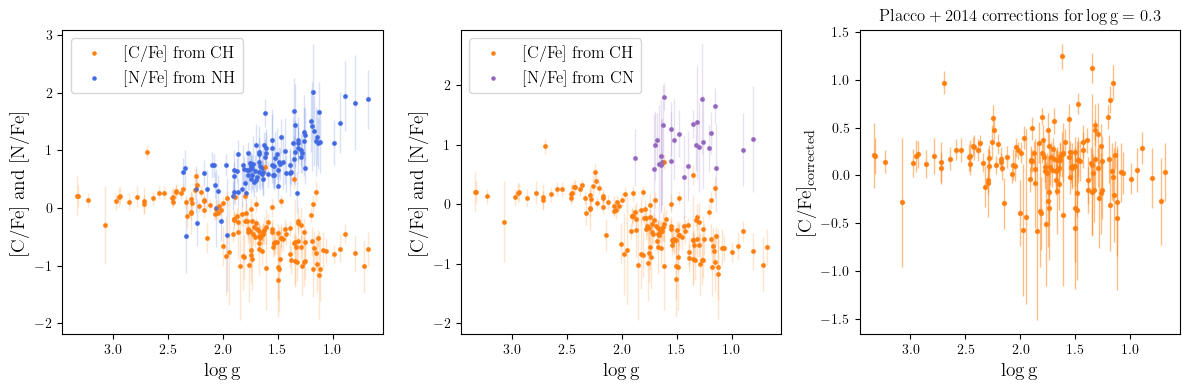

In [112]:
plt.figure(figsize=(12,4), dpi=100)

f_carbon = uves.ec_sme.values < 1
f_nitrogen_nh = uves.is_limit_n_nh.values & (uves.en_nh_sme.values < 1)
f_nitrogen_cn = uves.is_limit_n_cn.values & (uves.en_cn_sme.values < 1)

plt.subplot(1,3,1)
plt.scatter(uves.logg.values[f_carbon], uves.c.values[f_carbon] - solar.abund.get_element('C'), color='C1', s=5, zorder=9, label=r'${\rm [C/Fe]\ from\ CH}$')
plt.errorbar(uves.logg.values[f_carbon], uves.c.values[f_carbon] - solar.abund.get_element('C'), yerr=uves.ec_sme.values[f_carbon], 
             fmt='r.', color='C1', lw=1, zorder=9, alpha=0.2)
plt.scatter(uves.logg.values[f_nitrogen_nh], uves.n_nh.values[f_nitrogen_nh] - solar.abund.get_element('N'), color='royalblue', s=5, zorder=9, label=r'${\rm [N/Fe]\ from\ NH}$')
plt.errorbar(uves.logg.values[f_nitrogen_nh], uves.n_nh.values[f_nitrogen_nh] - solar.abund.get_element('N'), fmt='b.', lw=1, color='royalblue', 
             yerr=uves.en_nh_sme.values[f_nitrogen_nh], zorder=8, alpha=0.2)
plt.gca().invert_xaxis()
plt.legend(loc='upper left', fontsize=12)
plt.xlabel(r'${\rm \log{g}}$', size=14)
plt.ylabel(r'${\rm [C/Fe]\ and\ [N/Fe]}$', size=14)

plt.subplot(1,3,2)
plt.scatter(uves.logg.values[f_carbon], uves.c.values[f_carbon] - solar.abund.get_element('C'), color='C1', s=5, zorder=9, label=r'${\rm [C/Fe]\ from\ CH}$')
plt.errorbar(uves.logg.values[f_carbon], uves.c.values[f_carbon] - solar.abund.get_element('C'), yerr=uves.ec_sme.values[f_carbon], 
             fmt='r.', color='C1', lw=1, zorder=9, alpha=0.2)
plt.scatter(uves.logg.values[f_nitrogen_cn], uves.n_cn.values[f_nitrogen_cn] - solar.abund.get_element('N'), color='C4', s=5, zorder=9, label=r'${\rm [N/Fe]\ from\ CN}$')
plt.errorbar(uves.logg.values[f_nitrogen_cn], uves.n_cn.values[f_nitrogen_cn] - solar.abund.get_element('N'), fmt='b.', lw=1, color='C4', 
             yerr=uves.en_cn_sme.values[f_nitrogen_cn], zorder=8, alpha=0.2)
plt.gca().invert_xaxis()
plt.legend(loc='upper left', fontsize=12)
plt.xlabel(r'${\rm \log{g}}$', size=14)
plt.ylabel(r'${\rm [C/Fe]\ and\ [N/Fe]}$', size=14)

plt.subplot(1,3,3)
plt.scatter(uves.logg.values[f_carbon], uves.c.values[f_carbon] + uves.carbon_correction_03.values[f_carbon] - solar.abund.get_element('C'), color='C1', s=5, zorder=9)
plt.errorbar(uves.logg.values[f_carbon], uves.c.values[f_carbon] + uves.carbon_correction_03.values[f_carbon] - solar.abund.get_element('C'), 
             yerr=uves.ec_sme.values[f_carbon], fmt='r.', color='C1', lw=1, alpha=0.5)
plt.gca().invert_xaxis()
plt.xlabel(r'${\rm \log{g}}$', size=14)
plt.ylabel(r'${\rm [C/Fe]_{corrected}}$', size=14)
plt.title(r'${\rm Placco+2014\ corrections\ for \log{g} = 0.3}$')

plt.tight_layout()
plt.savefig('plots/UVES_CNFe_logg.pdf')
plt.show()